# 4. Data modelling

## Tabla resumen del clustering

En la siguiente tabla adaptada de la documentación de sklearn, podemos comprobar varios métodos de clustering, sus parámetros correspondientes, escalabilidad, su uso y las nociones de similitud que utilizan, así como el formato de datos de entrada necesario.

<table border="1">
<colgroup>
<col width="12.5%" />
<col width="12.5%" />
<col width="20%" />
<col width="20%" />
<col width="20%" />
<col width="15%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Nombre del método</th>
<th class="head">Parámetros</th>
<th class="head">Escalabilidad</th>
<th class="head">Uso</th>
<th class="head">Métrica</th>
<th class="head">Input</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><em>K-Means</em></td>
<td>Nº de clusters</td>
<td>Gran <cite>n_samples</cite>, mediano <cite>n_clusters</cite></td>
<td>Uso general, tamaño de grupo parejo, geometría plana, no demasiados clusters</td>
<td>Distancia entre puntos</td>
<td>Muestras de datos</td>
</tr>
<tr class="row-odd"><td><em>Spectral clustering</em></td>
<td>Nº de clusters</td>
<td>Mediano <cite>n_samples</cite>, pequeño <cite>n_clusters</cite></td>
<td>Pocos clusters, igual tamaño de cluster, geometría no plana</td>
<td>Distancia entre grafos (e.g. nearest-neighbor graph)</td>
<td>Matriz de afinidad/distancia</td>
</tr>
<tr class="row-even"><td><em>Hierarchical clustering</em></td>
<td>Nº de clusters / threshold</td>
<td>Gran <cite>n_samples</cite> y gran <cite>n_clusters</cite></td>
<td>Muchos clusters, posibles restricciones de conectividad</td>
<td>Distancias entre puntos</td>
<td>Muestras de datos</td>
</tr>
</tbody>
</table>


El **coeficiente de silueta** se calcula usando la *distancia media dentro del grupo* (a) y la *distancia media del cluster más cercano* (b) para cada muestra. El coeficiente de silueta para una muestra es:

                           (b - a) / max(a, b).

donde b es la distancia entre una muestra y el cluster más cercano del que la muestra no forma parte. Tenga en cuenta que el coeficiente de silueta solo se define si el número de etiquetas es: $ 2 <= n_{labels} <= n_{samples} - 1$

El algoritmo K-means agrupa los datos tratando de separar las muestras en $n$ grupos de igual varianza. En otras palabras, el algoritmo de K-means divide un conjunto de N muestras X en K grupos distintos C, cada uno descrito por la media de las muestras en el grupo. Las medias se denominan comúnmente clúster **“centroides”**.

     ¿Pertenecen los centroides al conjunto original de puntos?

El algoritmo K-means tiene como objetivo elegir centroides que minimicen un criterio conocido como **inercia** <inercia> o suma de cuadrados **dentro del cluster** .


La inercia, o el criterio de la suma de cuadrados dentro de un cluster, puede describirse como una medida de la coherencia interna de los grupos.

Hay que tener en cuenta varias cuestiones:

+ No es determinista - depende de la **inicialización**.
    
+ La inercia hace la **suposición** de que los grupos son **convexos e isotrópicos**, lo que no siempre es así. Responde mal a racimos alargados o variedades con formas irregulares.

+ ¿Puede el algoritmo asegurar **convergencia** al mínimo global? - Dado el tiempo suficiente, las K-means siempre convergerán.

+ Este algoritmo requiere que se especifique el **número de clusters**.

+ Se adapta bien a **un gran número de muestras** y se ha utilizado en una gran variedad de áreas de aplicación en muchos campos diferentes.






El cálculo a menudo se realiza varias veces, con diferentes inicializaciones de los centroides. Un método para ayudar a solucionar este problema es el esquema de inicialización k-means++, que se ha implementado en scikit-learn (use el parámetro init='kmeans++'). Esto inicializa los centroides para que estén (generalmente) distantes entre sí, lo que lleva a resultados probablemente mejores que la inicialización aleatoria.

In [1]:
#pip install progressbar
#pip install XXXXXXXXXXX [other packages needed]

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup, SoupStrainer
import sys
import ast
import string
import missingno as msno 
import seaborn as sn
import requests
import datetime
import progressbar
import time
import re
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#Maybe not used! (REVIEW)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn import cluster
import scipy.spatial.distance as distance
from sklearn.neighbors import kneighbors_graph
import pickle

import warnings
warnings.filterwarnings("ignore")


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

## 4.1 Importaciones

Importamos los archivos extraídos del Feature Engineering, los guardamos y les echamos echamos un primer vistazo

In [4]:
path = './Clean_data/Golden records/'

regs_golden_record_raw = pd.read_csv(path + 'RegS_golden_record.csv',index_col=0)
playoff_golden_record_raw = pd.read_csv(path + 'Playoff_golden_record.csv',index_col=0)
ring_golden_record_raw = pd.read_csv(path + 'ring_golden_record.csv',index_col=0)

In [5]:
regs_golden_record = regs_golden_record_raw.copy()
playoff_golden_record = playoff_golden_record_raw.copy()
ring_golden_record = ring_golden_record_raw.copy()

In [6]:
regs_golden_record.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.0,0.3225,0.25,...,106.400,0.494000,0,0,0,0,60,195.58,23,0
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.0,0.5140,0.05,...,105.325,0.362625,0,0,0,0,37,200.66,23,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,3.0,0.3060,0.30,...,107.700,0.232000,0,0,0,0,-100,200.66,22,0
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.0,0.4320,0.00,...,102.750,0.317000,0,0,0,0,-100,200.66,25,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.0,0.5000,0.30,...,105.900,0.500000,0,0,0,0,-100,180.34,27,0


In [7]:
playoff_golden_record.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO
0,/players/a/abdelal01.html,1.8,5,0,1,PF,57.0,0.5,0.4835,0.00,...,8.8,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6
1,/players/a/abdulma02.html,3.0,3,0,1,PG,74.0,15.0,0.4170,0.40,...,1.1,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9
2,/players/a/abdulta01.html,2.0,5,0,1,SG,54.0,32.5,0.4190,0.10,...,6.9,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9
3,/players/a/abdursh01.html,2.8,5,0,3,PF,81.0,76.5,0.4690,0.20,...,7.1,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9
4,/players/a/abrinal01.html,3.0,1,0,1,SG,71.5,7.0,0.3940,1.25,...,2.6,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9


In [8]:
ring_golden_record.head()

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,...,MEAN_BLK%_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_OFF_TEAM_RTG_SGFCT,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,...,0.50,9.85,16.05,112.65,112.65,108.100000,0,-100,23,0
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,...,0.75,11.50,21.50,110.75,101.05,108.450000,0,28,23,0
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,...,2.70,14.50,21.75,104.55,104.45,106.480000,0,-100,21,0
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,...,3.20,8.35,18.35,97.60,101.30,104.525000,0,-100,24,0
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,...,0.30,13.90,22.85,104.85,106.95,107.958824,0,5,22,0


## 4.2 Transformación y preparación de los datos para el clustering

### 4.2.1 RegS Golden Record

Analizamos los tipos de datos de las variables y tratamos las no numéricas

In [9]:
regs_golden_record.dtypes

URL                         object
MEAN_N_SEASONS_X_TEAM      float64
N_TEAMS                      int64
N_NBA_CHAMPION               int64
N_POSITIONS                  int64
COMMON_POSITION             object
MEAN_G_2S                  float64
MEAN_GS_2S                 float64
MEAN_FG%_PER_GAME_2S       float64
MEAN_3P_PER_GAME_2S        float64
MEAN_3P%_PER_GAME_2S       float64
MEAN_FT%_PER_GAME_2S       float64
MEAN_ORB_PER_GAME_2S       float64
MEAN_AST_PER_GAME_2S       float64
MEAN_STL_PER_GAME_2S       float64
MEAN_BLK_PER_GAME_2S       float64
MEAN_PF_PER_GAME_2S        float64
MEAN_PER_2S                float64
MEAN_3PAr_2S               float64
MEAN_FTr_2S                float64
MEAN_ORB%_2S               float64
MEAN_DRB%_2S               float64
MEAN_AST%_2S               float64
MEAN_STL%_2S               float64
MEAN_BLK%_2S               float64
MEAN_TOV%_2S               float64
MEAN_USG%_2S               float64
MEAN_OWS_2S                float64
MEAN_DBPM_2S        

In [10]:
string_cols = regs_golden_record.columns[regs_golden_record.dtypes == object]
string_cols

Index(['URL', 'COMMON_POSITION'], dtype='object')

Exploramos la variable *COMMON_POSITION*

In [11]:
for i in string_cols:
    if len(regs_golden_record[i].unique())<10:
        print('Distribution for column ' + i + ':')
        print(regs_golden_record[i].value_counts())
    else:
        print('To much categories in column ' + i)

To much categories in column URL
Distribution for column COMMON_POSITION:
SG    247
PG    240
SF    229
PF    227
C     212
Name: COMMON_POSITION, dtype: int64


<AxesSubplot:>

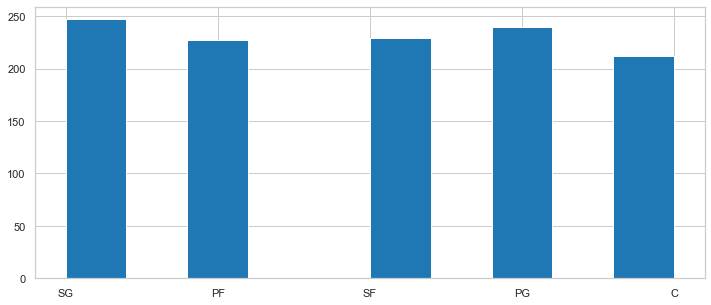

In [12]:
regs_golden_record['COMMON_POSITION'].hist()

#We only consider 5 positions:
#G -> Guard (1)
#G-F/F-G -> Shooting-guard (2)
#F -> Forward (3)
#F-C/C-F -> Power-forward (4)
#C -> Center (5)

Transformamos la variable *COMMON_POSITION* mediante One Hot Encoding y eliminamos la variable *URL*

In [13]:
regs_golden_record.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.0,0.3225,0.25,...,106.400,0.494000,0,0,0,0,60,195.58,23,0
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.0,0.5140,0.05,...,105.325,0.362625,0,0,0,0,37,200.66,23,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,3.0,0.3060,0.30,...,107.700,0.232000,0,0,0,0,-100,200.66,22,0
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.0,0.4320,0.00,...,102.750,0.317000,0,0,0,0,-100,200.66,25,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.0,0.5000,0.30,...,105.900,0.500000,0,0,0,0,-100,180.34,27,0


In [14]:
cols_to_drop = ['URL']
regs_golden_record_0 = regs_golden_record[[c for c in regs_golden_record.columns if c not in cols_to_drop]]

In [15]:
regs_golden_record_1 = regs_golden_record_0.copy()

regs_golden_record_1 = pd.get_dummies(regs_golden_record_1,prefix='',prefix_sep='')#,prefix='OHE'

In [16]:
regs_golden_record_1.head()

,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,...,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE,C,PF,PG,SF,SG
0,1.333333,3,0,1,15.0,0.0,0.3225,0.25,0.2750,0.250,...,0,60,195.58,23,0,0,0,0,0,1
1,1.571429,7,0,2,46.0,0.0,0.5140,0.05,0.3835,0.738,...,0,37,200.66,23,0,0,1,0,0,0
2,1.000000,1,0,1,19.0,3.0,0.3060,0.30,0.2610,1.000,...,0,-100,200.66,22,0,0,0,0,1,0
3,1.166667,6,0,1,15.5,0.0,0.4320,0.00,0.0000,0.581,...,0,-100,200.66,25,0,0,1,0,0,0
4,1.000000,1,0,1,3.0,0.0,0.5000,0.30,0.5000,0.000,...,0,-100,180.34,27,0,0,0,1,0,0


In [17]:
string_cols = regs_golden_record_1.columns[regs_golden_record_1.dtypes == object]
string_cols

Index([], dtype='object')

Normalizamos los datos numéricos para poder usar el k-means

{'whiskers': [<matplotlib.lines.Line2D at 0x218bbc71ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x218bbc84040>,
 'boxes': [<matplotlib.lines.Line2D at 0x218bbc71670>],
 'medians': [<matplotlib.lines.Line2D at 0x218bbc84760>],
 'fliers': [<matplotlib.lines.Line2D at 0x218bbc84af0>],
 'means': []}

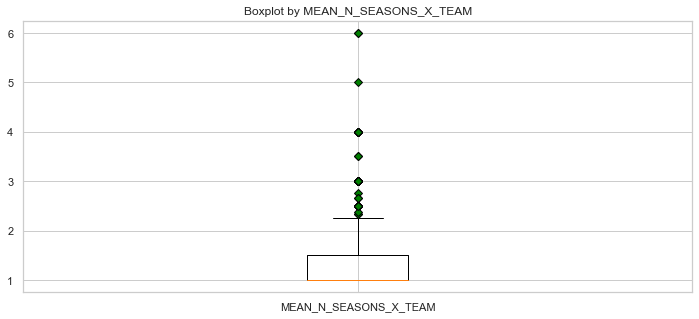

In [18]:
numeric_col_name = 'MEAN_N_SEASONS_X_TEAM'

subset = regs_golden_record_1[[numeric_col_name]]
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()

ax.set_title('Boxplot by ' + numeric_col_name)
ax.boxplot(subset, flierprops=green_diamond,labels=[numeric_col_name])

In [19]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datanorm_RegS = scaler.fit_transform(regs_golden_record_1.astype(float))

In [20]:
len(datanorm_RegS)

1155

### 4.2.2 Playoff Golden Record

Analizamos los tipos de datos de las variables y tratamos las no numéricas

In [21]:
playoff_golden_record.dtypes

URL                                 object
MEAN_N_SEASONS_X_TEAM              float64
N_TEAMS                              int64
N_NBA_CHAMPION                       int64
N_POSITIONS                          int64
COMMON_POSITION                     object
MEAN_G_2S                          float64
MEAN_GS_2S                         float64
MEAN_FG%_PER_GAME_2S               float64
MEAN_3P_PER_GAME_2S                float64
MEAN_3P%_PER_GAME_2S               float64
MEAN_FT%_PER_GAME_2S               float64
MEAN_ORB_PER_GAME_2S               float64
MEAN_AST_PER_GAME_2S               float64
MEAN_FTr_2S                        float64
MEAN_ORB%_2S                       float64
MEAN_DRB%_2S                       float64
MEAN_STL%_2S                       float64
MEAN_TOV%_2S                       float64
MEAN_USG%_2S                       float64
MEAN_OWS_2S                        float64
MEAN_DBPM_2S                       float64
MEAN_OFF_TEAM_RTG_2S               float64
MEAN_DEFF_T

In [22]:
string_cols = playoff_golden_record.columns[playoff_golden_record.dtypes == object]
string_cols

Index(['URL', 'COMMON_POSITION'], dtype='object')

Exploramos la variable *COMMON_POSITION*

In [23]:
for i in string_cols:
    if len(playoff_golden_record[i].unique())<10:
        print('Distribution for column ' + i + ':')
        print(playoff_golden_record[i].value_counts())
    else:
        print('To much categories in column ' + i)

To much categories in column URL
Distribution for column COMMON_POSITION:
SG    279
PF    264
PG    251
SF    248
C     239
Name: COMMON_POSITION, dtype: int64


<AxesSubplot:>

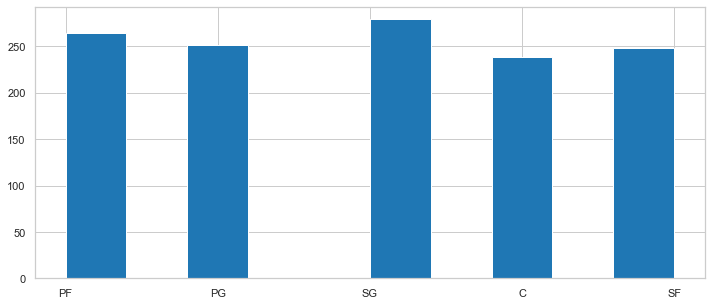

In [24]:
playoff_golden_record['COMMON_POSITION'].hist()

Transformamos la variable *COMMON_POSITION* mediante One Hot Encoding y eliminamos la variable *URL*

In [25]:
cols_to_drop = ['URL']
playoff_golden_record_0 = playoff_golden_record[[c for c in playoff_golden_record.columns if c not in cols_to_drop]]

In [26]:
playoff_golden_record_1 = playoff_golden_record_0.copy()

playoff_golden_record_1 = pd.get_dummies(playoff_golden_record_1,prefix='',prefix_sep='')#,prefix='OHE'

In [27]:
playoff_golden_record_1.head()

,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,...,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,C,PF,PG,SF,SG
0,1.8,5,0,1,57.0,0.5,0.4835,0.00,0.0000,0.6600,...,0.0,19.8,0.0,-2.6,-4.6,0,1,0,0,0
1,3.0,3,0,1,74.0,15.0,0.4170,0.40,0.2850,0.8635,...,7.7,24.8,0.2,-0.8,-1.9,0,0,1,0,0
2,2.0,5,0,1,54.0,32.5,0.4190,0.10,0.2485,0.6815,...,7.0,20.0,0.3,2.6,1.9,0,0,0,0,1
3,2.8,5,0,3,81.0,76.5,0.4690,0.20,0.3355,0.7650,...,20.8,22.8,0.0,-3.5,-1.9,0,1,0,0,0
4,3.0,1,0,1,71.5,7.0,0.3940,1.25,0.3805,0.8730,...,0.0,13.3,0.1,-2.8,-1.9,0,0,0,0,1


In [28]:
string_cols = playoff_golden_record_1.columns[playoff_golden_record_1.dtypes == object]
string_cols

Index([], dtype='object')

Normalizamos los datos numéricos para poder usar el k-means

{'whiskers': [<matplotlib.lines.Line2D at 0x218bbd6e1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x218bbd6e7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x218bbd60e20>],
 'medians': [<matplotlib.lines.Line2D at 0x218bbd6ef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x218bbdfc2e0>],
 'means': []}

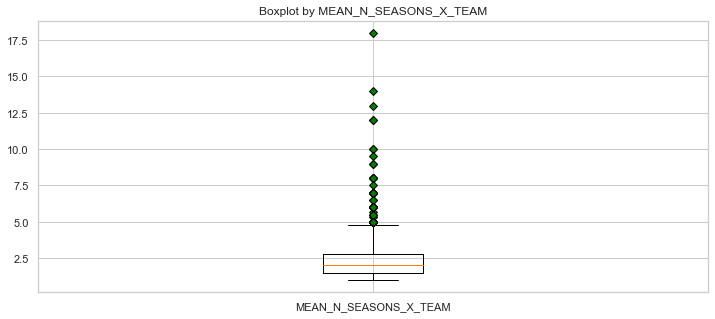

In [29]:
numeric_col_name = 'MEAN_N_SEASONS_X_TEAM' #se puede jugar con esta variable

subset = playoff_golden_record_1[[numeric_col_name]]
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()

ax.set_title('Boxplot by ' + numeric_col_name)
ax.boxplot(subset, flierprops=green_diamond,labels=[numeric_col_name])

In [30]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datanorm_playoff = scaler.fit_transform(playoff_golden_record_1.astype(float))

In [31]:
len(datanorm_playoff)

1281

### 4.2.2 Ring Golden Record

Analizamos los tipos de datos de las variables y tratamos las no numéricas

In [32]:
ring_golden_record.dtypes

URL                                 object
MEAN_G_RING                        float64
MEAN_GS_RING                       float64
MEAN_FG%_PER_GAME_RING             float64
MEAN_3P_PER_GAME_RING              float64
MEAN_3P%_PER_GAME_RING             float64
MEAN_FT%_PER_GAME_RING             float64
MEAN_ORB_PER_GAME_RING             float64
MEAN_FTr_RING                      float64
MEAN_DRB%_RING                     float64
MEAN_STL%_RING                     float64
MEAN_TOV%_RING                     float64
MEAN_USG%_RING                     float64
MEAN_DBPM_RING                     float64
MEAN_OFF_TEAM_RTG_RING             float64
MEAN_W/L%_TEAM_RING                float64
MEAN_G_PLAYOFF_1stPO               float64
MEAN_GS_PLAYOFF_1stPO              float64
MEAN_FG%_PER_GAME_PLAYOFF_1stPO    float64
MEAN_FT%_PER_GAME_PLAYOFF_1stPO    float64
MEAN_3P%_PER_GAME_PLAYOFF_1stPO    float64
MEAN_FTr_PLAYOFF_1stPO             float64
MEAN_ORB%_PLAYOFF_1stPO            float64
MEAN_DRB%_P

In [33]:
string_cols = ring_golden_record.columns[ring_golden_record.dtypes == object]
string_cols

Index(['URL', 'COMMON_POSITION'], dtype='object')

Exploramos la variable *COMMON_POSITION*

In [34]:
for i in string_cols:
    if len(ring_golden_record[i].unique())<10:
        print('Distribution for column ' + i + ':')
        print(ring_golden_record[i].value_counts())
    else:
        print('To much categories in column ' + i)

To much categories in column URL
Distribution for column COMMON_POSITION:
C     73
PF    68
SG    67
SF    67
PG    64
Name: COMMON_POSITION, dtype: int64


<AxesSubplot:>

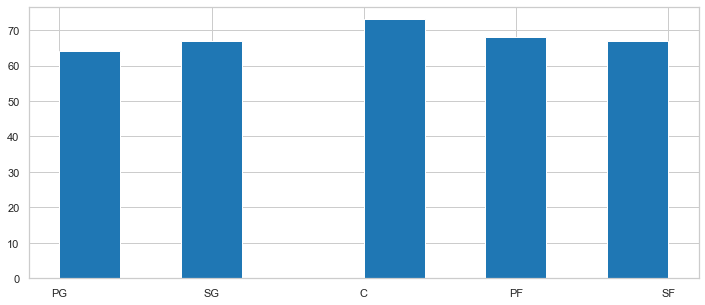

In [35]:
ring_golden_record['COMMON_POSITION'].hist()

Transformamos la variable *COMMON_POSITION* mediante One Hot Encoding y eliminamos la variable *URL*

In [36]:
cols_to_drop = ['URL']
ring_golden_record_0 = ring_golden_record[[c for c in ring_golden_record.columns if c not in cols_to_drop]]

In [37]:
ring_golden_record_1 = ring_golden_record_0.copy()

ring_golden_record_1 = pd.get_dummies(ring_golden_record_1,prefix='',prefix_sep='')#,prefix='OHE'

In [38]:
ring_golden_record_1.head()

,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,MEAN_STL%_RING,...,MEAN_OFF_TEAM_RTG_SGFCT,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,C,PF,PG,SF,SG
0,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,0.0,...,108.100000,0,-100,23,0,0,0,1,0,0
1,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,0.0,...,108.450000,0,28,23,0,0,0,0,0,1
2,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,2.1,...,106.480000,0,-100,21,0,1,0,0,0,0
3,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,0.9,...,104.525000,0,-100,24,0,0,1,0,0,0
4,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,1.5,...,107.958824,0,5,22,0,0,0,0,0,1


In [39]:
string_cols = ring_golden_record_1.columns[ring_golden_record_1.dtypes == object]
string_cols

Index([], dtype='object')

Normalizamos los datos numéricos para poder usar el k-means

{'whiskers': [<matplotlib.lines.Line2D at 0x218bbee4940>,
 'caps': [<matplotlib.lines.Line2D at 0x218bbee4f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x218bbee45b0>],
 'medians': [<matplotlib.lines.Line2D at 0x218bbef36d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x218bbef3a60>],
 'means': []}

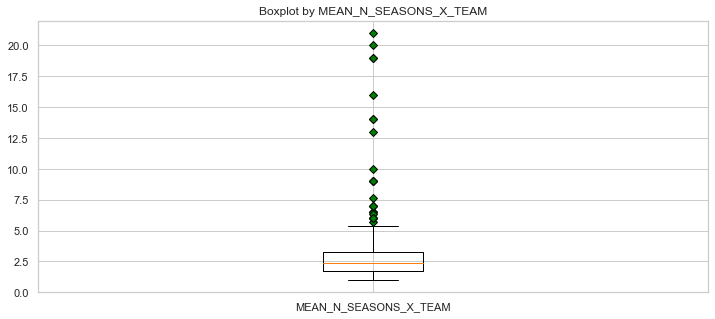

In [40]:
numeric_col_name = 'MEAN_N_SEASONS_X_TEAM' #se puede jugar con esta variable

subset = ring_golden_record_1[[numeric_col_name]]
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()

ax.set_title('Boxplot by ' + numeric_col_name)
ax.boxplot(subset, flierprops=green_diamond,labels=[numeric_col_name])

In [41]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance
datanorm_ring = scaler.fit_transform(ring_golden_record_1.astype(float))

In [42]:
len(datanorm_ring)

339

## 4.3 Clustering

Primer estudio con k-means y K=4. Recordemos que no queremos más de 8-12 clusters para obtener perfiles cualitativamente claros para los diferentes tipos de jugadores

Para los jugadores que no han jugado playoffs ni tienen ningún anillo (*datanorm_RegS*)

In [43]:
K=4
clf_rs = cluster.KMeans(n_clusters=K, random_state=0) #inicialización del k-means clustering
clf_rs.fit(datanorm_RegS) #run del k-means clustering

KMeans(n_clusters=4, random_state=0)

In [44]:
y_pred_RegS = clf_rs.predict(datanorm_RegS) #Predecir el cluster más probable al que pertence cada muestra
print(y_pred_RegS)

[3 2 1 ... 2 1 2]


In [45]:
print('Clusters:[', len(datanorm_RegS[(clf_rs.labels_==0)]),len(datanorm_RegS[(clf_rs.labels_==1)]),
              len(datanorm_RegS[(clf_rs.labels_==2)]),len(datanorm_RegS[(clf_rs.labels_==3)]),']')

Clusters:[ 94 376 358 327 ]


Para los jugadores que sí han jugado playoffs pero no tienen ningún anillo (*datanorm_playoff*)

In [46]:
K=4
clf_p = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf_p.fit(datanorm_playoff) #run the k-means clustering

KMeans(n_clusters=4, random_state=0)

In [47]:
y_pred_playoff = clf_p.predict(datanorm_playoff) #Predict the closest cluster each sample in X belongs to.
print(y_pred_playoff)

[3 1 0 ... 0 3 3]


In [48]:
print('Clusters:[', len(datanorm_playoff[(clf_p.labels_==0)]),len(datanorm_playoff[(clf_p.labels_==1)]),
              len(datanorm_playoff[(clf_p.labels_==2)]),len(datanorm_playoff[(clf_p.labels_==3)]),']')

Clusters:[ 448 379 64 390 ]


Para los jugadores que sí han ganado algún anillo (*datanorm_ring*)

In [49]:
K=4
clf_r = cluster.KMeans(n_clusters=K, random_state=0) #initialize the k-means clustering
clf_r.fit(datanorm_ring) #run the k-means clustering

KMeans(n_clusters=4, random_state=0)

In [50]:
y_pred_ring = clf_r.predict(datanorm_ring) #Predict the closest cluster each sample in X belongs to.
print(y_pred_ring)

[3 3 3 0 0 0 2 0 0 1 2 2 1 0 0 0 0 0 0 0 3 1 0 3 0 0 2 3 3 0 2 1 0 2 0 1 3
 2 0 3 0 2 0 2 3 2 3 2 0 3 3 1 0 0 0 0 2 2 3 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0
 0 1 0 3 2 3 3 3 2 0 3 3 1 2 0 0 2 0 1 1 3 1 0 1 2 2 3 0 2 0 0 0 0 0 2 1 0
 1 1 1 3 0 1 0 2 1 2 0 1 0 3 3 2 1 0 3 0 3 0 3 1 0 2 2 3 1 0 3 1 3 0 2 3 0
 0 1 0 1 0 0 3 1 1 0 3 0 3 0 0 3 3 2 0 0 3 0 0 3 2 2 2 0 1 0 1 2 3 2 1 3 0
 3 0 2 2 1 1 0 0 2 2 2 1 3 3 3 0 2 2 0 2 2 3 3 0 0 1 2 3 3 3 0 0 2 2 2 3 0
 0 2 2 3 3 2 0 3 1 3 2 1 1 2 2 0 1 0 0 2 2 2 1 1 3 2 1 0 2 3 0 1 3 0 3 2 2
 0 3 0 0 1 0 2 1 2 3 2 3 0 0 1 3 2 2 0 0 0 2 3 2 2 0 0 0 0 2 0 2 0 1 3 2 2
 3 1 1 3 3 0 2 0 2 0 2 2 0 0 0 1 3 3 0 1 2 2 1 0 3 0 2 2 0 0 3 1 0 0 0 2 2
 3 0 0 3 2 0]


In [51]:
print('Clusters:[', len(datanorm_ring[(clf_r.labels_==0)]),len(datanorm_ring[(clf_r.labels_==1)]),
              len(datanorm_ring[(clf_r.labels_==2)]),len(datanorm_ring[(clf_r.labels_==3)]),']')

Clusters:[ 127 53 85 74 ]


### 4.3.1 Análisis en profundidad del clustering de *RegS*

Realizamos varias pruebas usando K-means para determinar el número de K óptimo

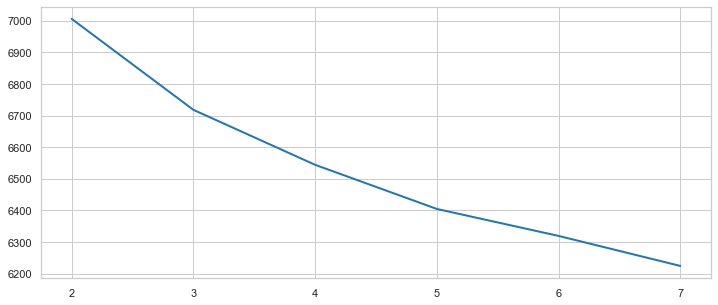

In [52]:
d=[]
for K in range(2,8):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(datanorm_RegS)
    y_pred = clf.predict(datanorm_RegS)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(datanorm_RegS[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,8),d)

In [53]:
inrt=np.zeros(12)
sil_kmeans_r=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='random', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_RegS)
        inrt[i]=clf.inertia_
        sil_kmeans_r[i]=metrics.silhouette_score(datanorm_RegS, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 238 players
Cluster 1 has 917 players
k: 3
Cluster 0 has 424 players
Cluster 1 has 589 players
Cluster 2 has 142 players
k: 4
Cluster 0 has 94 players
Cluster 1 has 314 players
Cluster 2 has 377 players
Cluster 3 has 370 players
k: 5
Cluster 0 has 78 players
Cluster 1 has 290 players
Cluster 2 has 199 players
Cluster 3 has 264 players
Cluster 4 has 324 players
k: 6
Cluster 0 has 212 players
Cluster 1 has 303 players
Cluster 2 has 74 players
Cluster 3 has 175 players
Cluster 4 has 141 players
Cluster 5 has 250 players
k: 7
Cluster 0 has 185 players
Cluster 1 has 267 players
Cluster 2 has 40 players
Cluster 3 has 172 players
Cluster 4 has 119 players
Cluster 5 has 231 players
Cluster 6 has 141 players
k: 8
Cluster 0 has 196 players
Cluster 1 has 188 players
Cluster 2 has 149 players
Cluster 3 has 126 players
Cluster 4 has 264 players
Cluster 5 has 120 players
Cluster 6 has 33 players
Cluster 7 has 79 players
k: 9
Cluster 0 has 171 players
Cluster 1 has 189 players
Clus

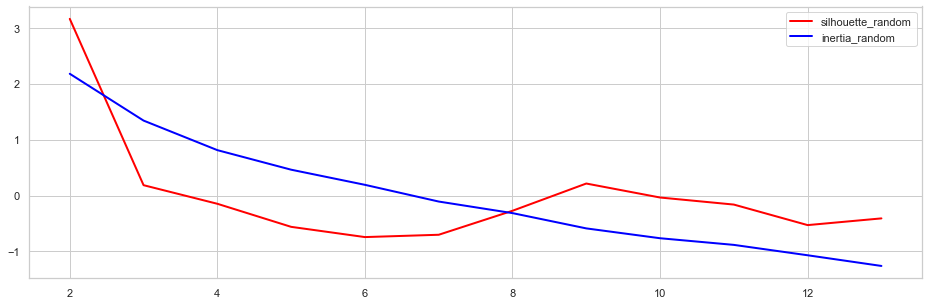

In [54]:
plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_r.reshape(-1, 1)),'r', label='silhouette_random')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_random')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

In [55]:
inrt=np.zeros(12)
sil_kmeans_plus=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='k-means++', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_RegS)
        inrt[i]=clf.inertia_
        sil_kmeans_plus[i]=metrics.silhouette_score(datanorm_RegS, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 917 players
Cluster 1 has 238 players
k: 3
Cluster 0 has 432 players
Cluster 1 has 140 players
Cluster 2 has 583 players
k: 4
Cluster 0 has 94 players
Cluster 1 has 376 players
Cluster 2 has 358 players
Cluster 3 has 327 players
k: 5
Cluster 0 has 290 players
Cluster 1 has 75 players
Cluster 2 has 200 players
Cluster 3 has 264 players
Cluster 4 has 326 players
k: 6
Cluster 0 has 321 players
Cluster 1 has 284 players
Cluster 2 has 3 players
Cluster 3 has 83 players
Cluster 4 has 199 players
Cluster 5 has 265 players
k: 7
Cluster 0 has 251 players
Cluster 1 has 289 players
Cluster 2 has 223 players
Cluster 3 has 1 players
Cluster 4 has 75 players
Cluster 5 has 178 players
Cluster 6 has 138 players
k: 8
Cluster 0 has 199 players
Cluster 1 has 164 players
Cluster 2 has 274 players
Cluster 3 has 176 players
Cluster 4 has 127 players
Cluster 5 has 37 players
Cluster 6 has 175 players
Cluster 7 has 3 players
k: 9
Cluster 0 has 124 players
Cluster 1 has 108 players
Cluster 2

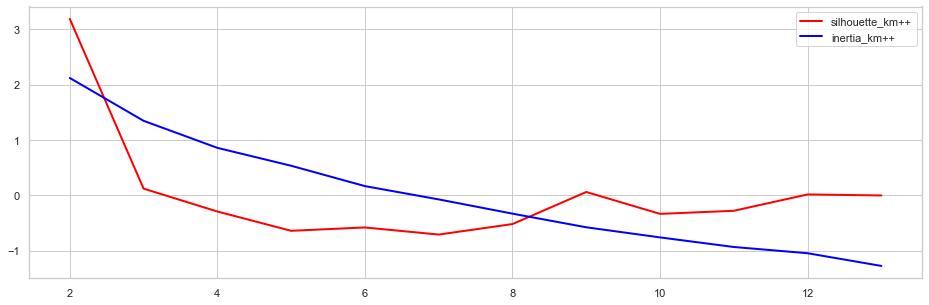

In [56]:
warnings.filterwarnings("ignore")

plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_plus.reshape(-1, 1)),'r', label='silhouette_km++')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_km++')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Parece que la mejor elección que podemos hacer es K=3. Pero antes, vamos a estudiar otras técnicas de clustering

Empezamos por el hierarhical clustering

In [57]:
sil_single=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=None)
        single.fit(datanorm_RegS)
        sil_single[i]=metrics.silhouette_score(datanorm_RegS, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 1154 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 2 players
Cluster 1 has 1 players
Cluster 2 has 1152 players
k: 4
Cluster 0 has 1152 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 1151 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 1150 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 2 players
Cluster 1 has 1 players
Cluster 2 has 1148 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 1148 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 1147 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players


In [58]:
sil_single_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_RegS, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_RegS)
        sil_single_con[i]=metrics.silhouette_score(datanorm_RegS, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 1154 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 2 players
Cluster 1 has 1 players
Cluster 2 has 1152 players
k: 4
Cluster 0 has 1152 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 1151 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 1150 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 2 players
Cluster 1 has 1 players
Cluster 2 has 1148 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 1148 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 1147 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players


In [59]:
sil_ward_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_RegS, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="ward",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_RegS)
        sil_ward_con[i]=metrics.silhouette_score(datanorm_RegS, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(single.labels_==i)])) + ' players')
            

k: 2
Cluster 0 has 1116 players
Cluster 1 has 39 players
k: 3
Cluster 0 has 778 players
Cluster 1 has 39 players
Cluster 2 has 338 players
k: 4
Cluster 0 has 39 players
Cluster 1 has 278 players
Cluster 2 has 338 players
Cluster 3 has 500 players
k: 5
Cluster 0 has 278 players
Cluster 1 has 500 players
Cluster 2 has 338 players
Cluster 3 has 3 players
Cluster 4 has 36 players
k: 6
Cluster 0 has 500 players
Cluster 1 has 3 players
Cluster 2 has 338 players
Cluster 3 has 113 players
Cluster 4 has 36 players
Cluster 5 has 165 players
k: 7
Cluster 0 has 459 players
Cluster 1 has 3 players
Cluster 2 has 338 players
Cluster 3 has 113 players
Cluster 4 has 36 players
Cluster 5 has 165 players
Cluster 6 has 41 players
k: 8
Cluster 0 has 338 players
Cluster 1 has 189 players
Cluster 2 has 270 players
Cluster 3 has 3 players
Cluster 4 has 36 players
Cluster 5 has 165 players
Cluster 6 has 41 players
Cluster 7 has 113 players
k: 9
Cluster 0 has 270 players
Cluster 1 has 189 players
Cluster 2 has 

Seguimos con el spectral clustering

In [60]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        spectral = cluster.SpectralClustering(n_clusters=i*1+2,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datanorm_RegS)
        sil_spectral[i]=metrics.silhouette_score(datanorm_RegS, spectral.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_RegS[(spectral.labels_==i)])) + ' players')

k: 2
Cluster 0 has 492 players
Cluster 1 has 663 players
k: 3
Cluster 0 has 484 players
Cluster 1 has 430 players
Cluster 2 has 241 players
k: 4
Cluster 0 has 473 players
Cluster 1 has 229 players
Cluster 2 has 261 players
Cluster 3 has 192 players
k: 5
Cluster 0 has 225 players
Cluster 1 has 197 players
Cluster 2 has 240 players
Cluster 3 has 227 players
Cluster 4 has 266 players
k: 6
Cluster 0 has 230 players
Cluster 1 has 221 players
Cluster 2 has 200 players
Cluster 3 has 247 players
Cluster 4 has 213 players
Cluster 5 has 44 players
k: 7
Cluster 0 has 216 players
Cluster 1 has 203 players
Cluster 2 has 197 players
Cluster 3 has 234 players
Cluster 4 has 221 players
Cluster 5 has 42 players
Cluster 6 has 42 players
k: 8
Cluster 0 has 42 players
Cluster 1 has 114 players
Cluster 2 has 180 players
Cluster 3 has 209 players
Cluster 4 has 193 players
Cluster 5 has 38 players
Cluster 6 has 196 players
Cluster 7 has 183 players
k: 9
Cluster 0 has 152 players
Cluster 1 has 164 players
Clu

Visualizamos cómo se aplican a nuestro caso varios métodos de clustering

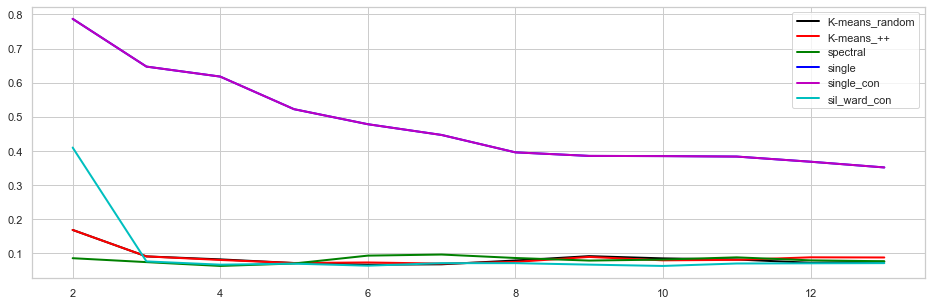

In [61]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')
plt.plot(np.arange(12)*1+2,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*1+2,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*1+2,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*1+2,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

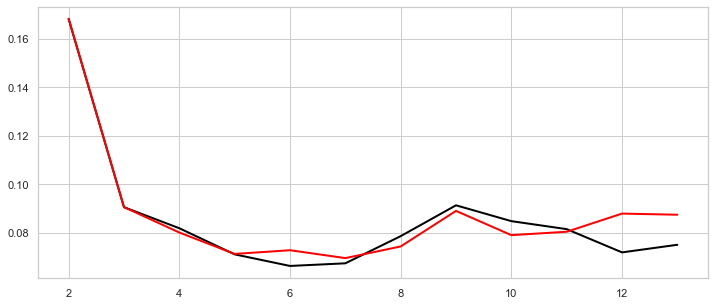

In [62]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')

PCA

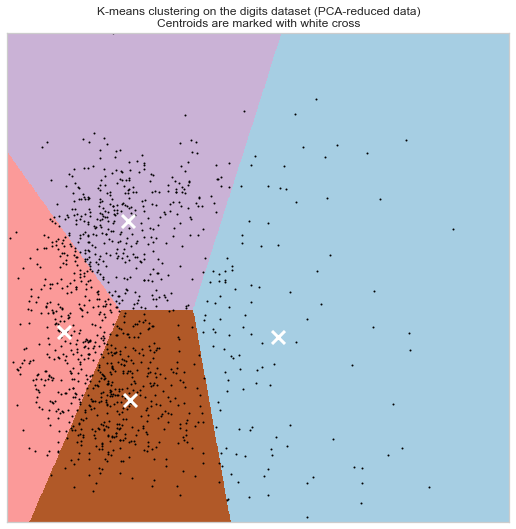

In [63]:
reduced_data = PCA(n_components=2).fit_transform(datanorm_RegS)
kmeans = cluster.KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

h = .02             

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches((9,9))

Finalmente, nos quedamos con el **K-means**, con **K=3**

### 4.3.2 Análisis en profundidad del clustering de *playoff*

Realizamos varias pruebas usando K-means para determinar el número de K óptimo

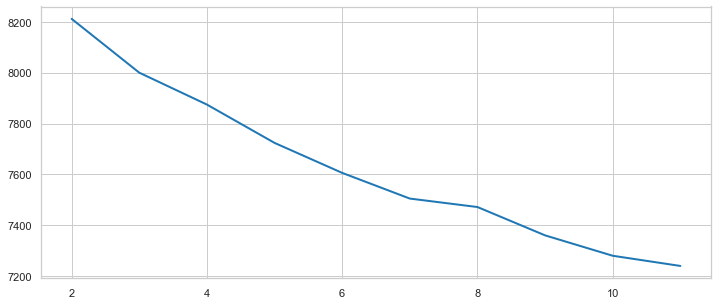

In [64]:
d=[]
for K in range(2,12):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(datanorm_playoff)
    y_pred = clf.predict(datanorm_playoff)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(datanorm_playoff[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,12),d)

In [65]:
inrt=np.zeros(12)
sil_kmeans_r=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='random', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_playoff)
        inrt[i]=clf.inertia_
        sil_kmeans_r[i]=metrics.silhouette_score(datanorm_playoff, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 482 players
Cluster 1 has 799 players
k: 3
Cluster 0 has 236 players
Cluster 1 has 628 players
Cluster 2 has 417 players
k: 4
Cluster 0 has 392 players
Cluster 1 has 397 players
Cluster 2 has 66 players
Cluster 3 has 426 players
k: 5
Cluster 0 has 365 players
Cluster 1 has 309 players
Cluster 2 has 316 players
Cluster 3 has 78 players
Cluster 4 has 213 players
k: 6
Cluster 0 has 76 players
Cluster 1 has 217 players
Cluster 2 has 203 players
Cluster 3 has 279 players
Cluster 4 has 294 players
Cluster 5 has 212 players
k: 7
Cluster 0 has 182 players
Cluster 1 has 212 players
Cluster 2 has 240 players
Cluster 3 has 187 players
Cluster 4 has 208 players
Cluster 5 has 175 players
Cluster 6 has 77 players
k: 8
Cluster 0 has 224 players
Cluster 1 has 272 players
Cluster 2 has 17 players
Cluster 3 has 197 players
Cluster 4 has 23 players
Cluster 5 has 249 players
Cluster 6 has 96 players
Cluster 7 has 203 players
k: 9
Cluster 0 has 212 players
Cluster 1 has 168 players
Clust

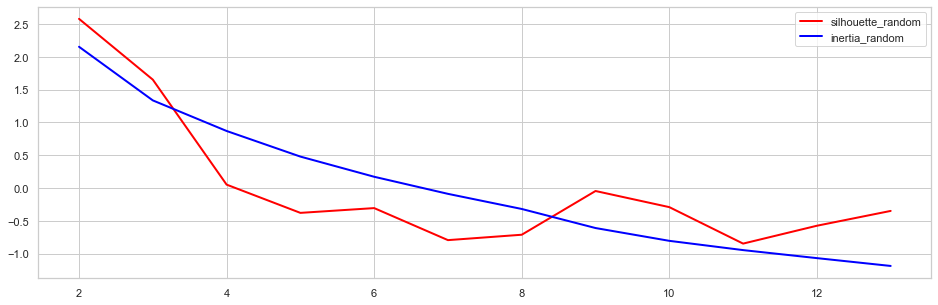

In [66]:
plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_r.reshape(-1, 1)),'r', label='silhouette_random')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_random')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

In [67]:
inrt=np.zeros(12)
sil_kmeans_plus=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='k-means++', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_playoff)
        inrt[i]=clf.inertia_
        sil_kmeans_plus[i]=metrics.silhouette_score(datanorm_playoff, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 794 players
Cluster 1 has 487 players
k: 3
Cluster 0 has 417 players
Cluster 1 has 630 players
Cluster 2 has 234 players
k: 4
Cluster 0 has 448 players
Cluster 1 has 379 players
Cluster 2 has 64 players
Cluster 3 has 390 players
k: 5
Cluster 0 has 219 players
Cluster 1 has 330 players
Cluster 2 has 361 players
Cluster 3 has 294 players
Cluster 4 has 77 players
k: 6
Cluster 0 has 208 players
Cluster 1 has 225 players
Cluster 2 has 347 players
Cluster 3 has 228 players
Cluster 4 has 221 players
Cluster 5 has 52 players
k: 7
Cluster 0 has 229 players
Cluster 1 has 222 players
Cluster 2 has 201 players
Cluster 3 has 201 players
Cluster 4 has 145 players
Cluster 5 has 211 players
Cluster 6 has 72 players
k: 8
Cluster 0 has 196 players
Cluster 1 has 135 players
Cluster 2 has 37 players
Cluster 3 has 216 players
Cluster 4 has 201 players
Cluster 5 has 201 players
Cluster 6 has 135 players
Cluster 7 has 160 players
k: 9
Cluster 0 has 84 players
Cluster 1 has 199 players
Clus

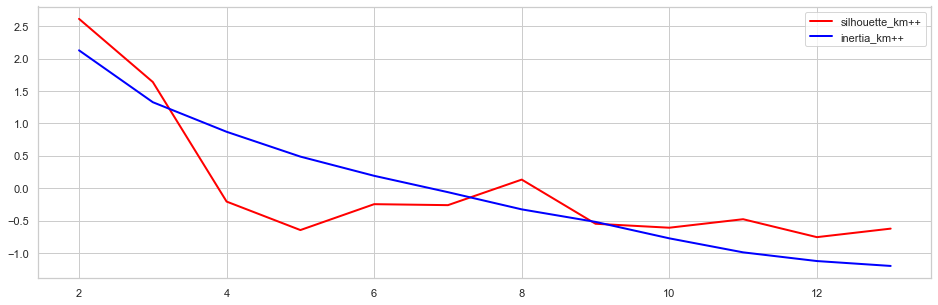

In [68]:
plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_plus.reshape(-1, 1)),'r', label='silhouette_km++')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_km++')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Parece que la mejor elección que podemos hacer es K=4. Pero antes, vamos a estudiar otras técnicas de clustering

Empezamos por el hierarhical clustering

In [69]:
sil_single=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=None)
        single.fit(datanorm_playoff)
        sil_single[i]=metrics.silhouette_score(datanorm_playoff, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 1280 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 1279 players
Cluster 1 has 1 players
Cluster 2 has 1 players
k: 4
Cluster 0 has 1278 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 1277 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 1276 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 1275 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 1274 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 1273 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players


In [70]:
sil_single_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_playoff, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_playoff)
        sil_single_con[i]=metrics.silhouette_score(datanorm_playoff, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 1280 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 1279 players
Cluster 1 has 1 players
Cluster 2 has 1 players
k: 4
Cluster 0 has 1278 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 1277 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 1276 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 1275 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 1274 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 1257 players
Cluster 1 has 17 players
Cluster 2 has 1 players
Cluster 3 has 1 players

In [71]:
sil_ward_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_playoff, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="ward",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_playoff)
        sil_ward_con[i]=metrics.silhouette_score(datanorm_playoff, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 772 players
Cluster 1 has 509 players
k: 3
Cluster 0 has 689 players
Cluster 1 has 509 players
Cluster 2 has 83 players
k: 4
Cluster 0 has 465 players
Cluster 1 has 509 players
Cluster 2 has 83 players
Cluster 3 has 224 players
k: 5
Cluster 0 has 83 players
Cluster 1 has 509 players
Cluster 2 has 240 players
Cluster 3 has 224 players
Cluster 4 has 225 players
k: 6
Cluster 0 has 509 players
Cluster 1 has 66 players
Cluster 2 has 240 players
Cluster 3 has 224 players
Cluster 4 has 225 players
Cluster 5 has 17 players
k: 7
Cluster 0 has 240 players
Cluster 1 has 66 players
Cluster 2 has 295 players
Cluster 3 has 224 players
Cluster 4 has 225 players
Cluster 5 has 17 players
Cluster 6 has 214 players
k: 8
Cluster 0 has 66 players
Cluster 1 has 225 players
Cluster 2 has 295 players
Cluster 3 has 224 players
Cluster 4 has 239 players
Cluster 5 has 17 players
Cluster 6 has 214 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 225 players
Cluster 1 has 239 players
Cluster 2

Seguimos con el spectral clustering

In [72]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        spectral = cluster.SpectralClustering(n_clusters=i*1+2,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datanorm_playoff)
        sil_spectral[i]=metrics.silhouette_score(datanorm_playoff, spectral.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_playoff[(spectral.labels_==i)])) + ' players')

k: 2
Cluster 0 has 1244 players
Cluster 1 has 37 players
k: 3
Cluster 0 has 491 players
Cluster 1 has 753 players
Cluster 2 has 37 players
k: 4
Cluster 0 has 769 players
Cluster 1 has 238 players
Cluster 2 has 37 players
Cluster 3 has 237 players
k: 5
Cluster 0 has 236 players
Cluster 1 has 531 players
Cluster 2 has 40 players
Cluster 3 has 236 players
Cluster 4 has 238 players
k: 6
Cluster 0 has 249 players
Cluster 1 has 284 players
Cluster 2 has 246 players
Cluster 3 has 237 players
Cluster 4 has 238 players
Cluster 5 has 27 players
k: 7
Cluster 0 has 23 players
Cluster 1 has 247 players
Cluster 2 has 17 players
Cluster 3 has 239 players
Cluster 4 has 245 players
Cluster 5 has 273 players
Cluster 6 has 237 players
k: 8
Cluster 0 has 236 players
Cluster 1 has 238 players
Cluster 2 has 233 players
Cluster 3 has 187 players
Cluster 4 has 238 players
Cluster 5 has 110 players
Cluster 6 has 22 players
Cluster 7 has 17 players
k: 9
Cluster 0 has 17 players
Cluster 1 has 114 players
Cluster

Visualizamos cómo se aplican a nuestro caso varios métodos de clustering

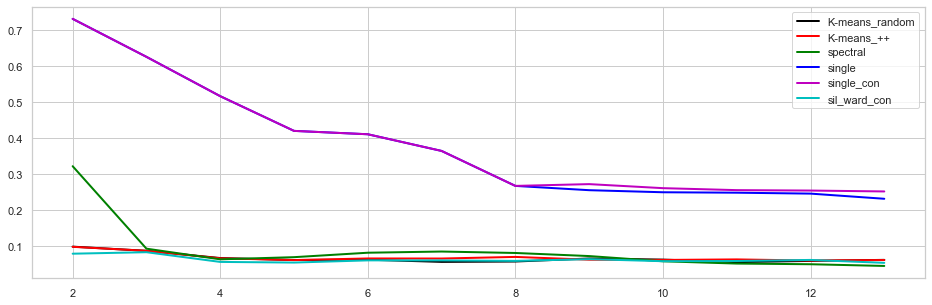

In [73]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')
plt.plot(np.arange(12)*1+2,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*1+2,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*1+2,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*1+2,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

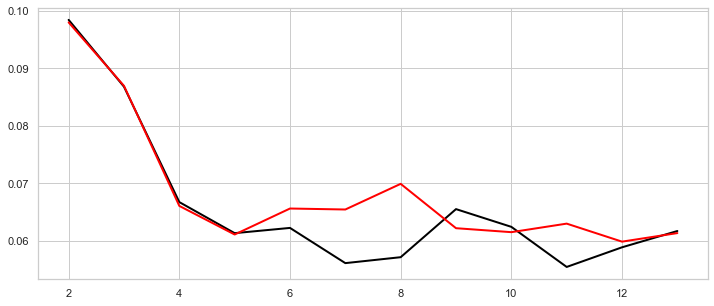

In [74]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')

Finalmente, nos quedamos con el **K-means**, con **K=4**

PCA

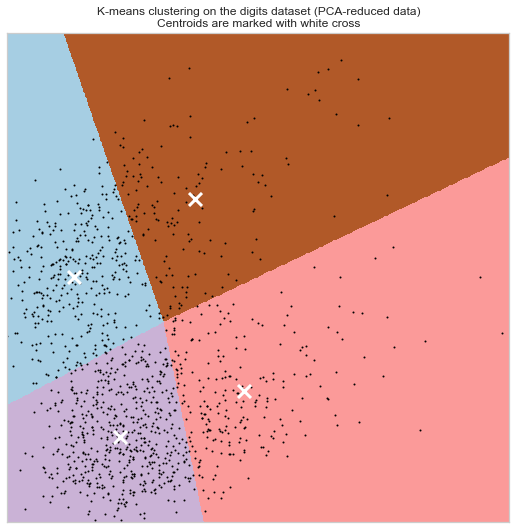

In [75]:
reduced_data = PCA(n_components=2).fit_transform(datanorm_playoff)
kmeans = cluster.KMeans(init='k-means++', n_clusters=4, n_init=90)
kmeans.fit(reduced_data)

h = .02            

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches((9,9))

### 4.3.3 Análisis en profundidad del clustering de *ring*

Realizamos varias pruebas usando K-means para determinar el número de K óptimo

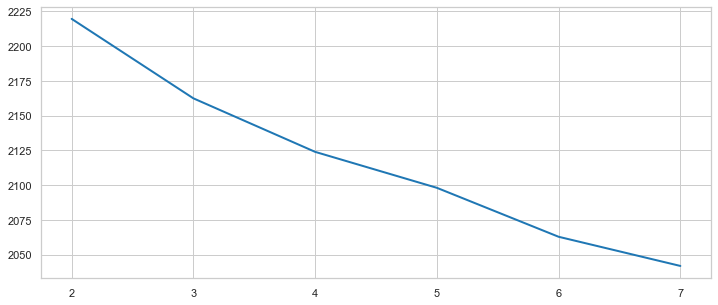

In [76]:
d=[]
for K in range(2,8):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(datanorm_ring)
    y_pred = clf.predict(datanorm_ring)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(datanorm_ring[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,8),d)

In [77]:
inrt=np.zeros(12)
sil_kmeans_r=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='random', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_ring)
        inrt[i]=clf.inertia_
        sil_kmeans_r[i]=metrics.silhouette_score(datanorm_ring, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 217 players
Cluster 1 has 122 players
k: 3
Cluster 0 has 97 players
Cluster 1 has 93 players
Cluster 2 has 149 players
k: 4
Cluster 0 has 60 players
Cluster 1 has 85 players
Cluster 2 has 135 players
Cluster 3 has 59 players
k: 5
Cluster 0 has 51 players
Cluster 1 has 35 players
Cluster 2 has 65 players
Cluster 3 has 133 players
Cluster 4 has 55 players
k: 6
Cluster 0 has 51 players
Cluster 1 has 32 players
Cluster 2 has 53 players
Cluster 3 has 56 players
Cluster 4 has 68 players
Cluster 5 has 79 players
k: 7
Cluster 0 has 45 players
Cluster 1 has 28 players
Cluster 2 has 53 players
Cluster 3 has 55 players
Cluster 4 has 64 players
Cluster 5 has 83 players
Cluster 6 has 11 players
k: 8
Cluster 0 has 1 players
Cluster 1 has 90 players
Cluster 2 has 54 players
Cluster 3 has 49 players
Cluster 4 has 30 players
Cluster 5 has 41 players
Cluster 6 has 33 players
Cluster 7 has 41 players
k: 9
Cluster 0 has 35 players
Cluster 1 has 45 players
Cluster 2 has 52 players
Cluste

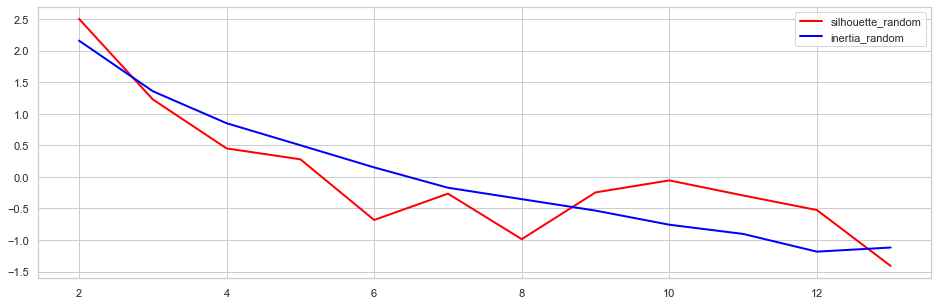

In [78]:
plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_r.reshape(-1, 1)),'r', label='silhouette_random')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_random')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

In [79]:
inrt=np.zeros(12)
sil_kmeans_plus=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        clf = cluster.KMeans(init='k-means++', n_clusters=i*1+2, random_state=0)
        clf.fit(datanorm_ring)
        inrt[i]=clf.inertia_
        sil_kmeans_plus[i]=metrics.silhouette_score(datanorm_ring, clf.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(clf.labels_==i)])) + ' players')

k: 2
Cluster 0 has 119 players
Cluster 1 has 220 players
k: 3
Cluster 0 has 95 players
Cluster 1 has 95 players
Cluster 2 has 149 players
k: 4
Cluster 0 has 127 players
Cluster 1 has 53 players
Cluster 2 has 85 players
Cluster 3 has 74 players
k: 5
Cluster 0 has 68 players
Cluster 1 has 56 players
Cluster 2 has 109 players
Cluster 3 has 48 players
Cluster 4 has 58 players
k: 6
Cluster 0 has 46 players
Cluster 1 has 56 players
Cluster 2 has 94 players
Cluster 3 has 41 players
Cluster 4 has 30 players
Cluster 5 has 72 players
k: 7
Cluster 0 has 65 players
Cluster 1 has 29 players
Cluster 2 has 58 players
Cluster 3 has 47 players
Cluster 4 has 25 players
Cluster 5 has 39 players
Cluster 6 has 76 players
k: 8
Cluster 0 has 56 players
Cluster 1 has 35 players
Cluster 2 has 38 players
Cluster 3 has 49 players
Cluster 4 has 76 players
Cluster 5 has 35 players
Cluster 6 has 11 players
Cluster 7 has 39 players
k: 9
Cluster 0 has 11 players
Cluster 1 has 28 players
Cluster 2 has 51 players
Clust

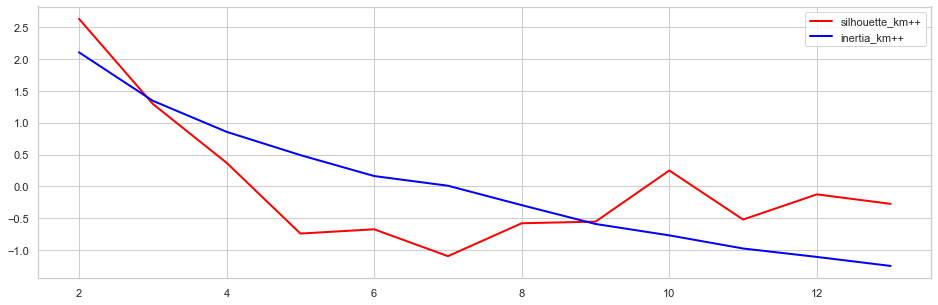

In [80]:
warnings.filterwarnings("ignore")

plt.plot(np.arange(12)*1+2,scaler.fit_transform(sil_kmeans_plus.reshape(-1, 1)),'r', label='silhouette_km++')
plt.plot(np.arange(12)*1+2,scaler.fit_transform(inrt.reshape(-1, 1)),'b', label='inertia_km++')
plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

Parece que la mejor elección que podemos hacer es K=3. Pero antes, vamos a estudiar otras técnicas de clustering

Empezamos por el hierarhical clustering

In [81]:
sil_single=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=None)
        single.fit(datanorm_ring)
        sil_single[i]=metrics.silhouette_score(datanorm_ring, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 338 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 337 players
Cluster 1 has 1 players
Cluster 2 has 1 players
k: 4
Cluster 0 has 336 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 335 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 334 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 333 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 332 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 331 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 

In [82]:
sil_single_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_ring, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="single",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_ring)
        sil_single_con[i]=metrics.silhouette_score(datanorm_ring, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 338 players
Cluster 1 has 1 players
k: 3
Cluster 0 has 337 players
Cluster 1 has 1 players
Cluster 2 has 1 players
k: 4
Cluster 0 has 336 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
k: 5
Cluster 0 has 335 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
k: 6
Cluster 0 has 334 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
k: 7
Cluster 0 has 333 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
k: 8
Cluster 0 has 332 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 4 has 1 players
Cluster 5 has 1 players
Cluster 6 has 1 players
Cluster 7 has 1 players
k: 9
Cluster 0 has 331 players
Cluster 1 has 1 players
Cluster 2 has 1 players
Cluster 3 has 1 players
Cluster 

In [83]:
sil_ward_con=np.zeros(12)
connectivity = kneighbors_graph(datanorm_ring, n_neighbors=5)
for i in range(12):
        print('k:',1*i+2)
        single = cluster.AgglomerativeClustering(linkage="ward",n_clusters=1*i+2,connectivity=connectivity)
        single.fit(datanorm_ring)
        sil_ward_con[i]=metrics.silhouette_score(datanorm_ring, single.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(single.labels_==i)])) + ' players')

k: 2
Cluster 0 has 283 players
Cluster 1 has 56 players
k: 3
Cluster 0 has 224 players
Cluster 1 has 56 players
Cluster 2 has 59 players
k: 4
Cluster 0 has 167 players
Cluster 1 has 57 players
Cluster 2 has 59 players
Cluster 3 has 56 players
k: 5
Cluster 0 has 57 players
Cluster 1 has 56 players
Cluster 2 has 59 players
Cluster 3 has 89 players
Cluster 4 has 78 players
k: 6
Cluster 0 has 56 players
Cluster 1 has 37 players
Cluster 2 has 59 players
Cluster 3 has 89 players
Cluster 4 has 78 players
Cluster 5 has 20 players
k: 7
Cluster 0 has 37 players
Cluster 1 has 89 players
Cluster 2 has 59 players
Cluster 3 has 45 players
Cluster 4 has 78 players
Cluster 5 has 20 players
Cluster 6 has 11 players
k: 8
Cluster 0 has 89 players
Cluster 1 has 78 players
Cluster 2 has 59 players
Cluster 3 has 45 players
Cluster 4 has 10 players
Cluster 5 has 20 players
Cluster 6 has 11 players
Cluster 7 has 27 players
k: 9
Cluster 0 has 59 players
Cluster 1 has 78 players
Cluster 2 has 20 players
Cluster

Seguimos con el spectral clustering

In [84]:
sil_spectral=np.zeros(12)

for i in range(12):
        print('k:',1*i+2)
        spectral = cluster.SpectralClustering(n_clusters=i*1+2,  affinity="nearest_neighbors",  eigen_solver='arpack')
        spectral.fit(datanorm_ring)
        sil_spectral[i]=metrics.silhouette_score(datanorm_ring, spectral.labels_,  metric='euclidean')
        N = 1*i+2
        for i in range(N):
            print('Cluster ' + str(i) + ' has ' + str(len(datanorm_ring[(spectral.labels_==i)])) + ' players')

k: 2
Cluster 0 has 215 players
Cluster 1 has 124 players
k: 3
Cluster 0 has 172 players
Cluster 1 has 110 players
Cluster 2 has 57 players
k: 4
Cluster 0 has 57 players
Cluster 1 has 97 players
Cluster 2 has 129 players
Cluster 3 has 56 players
k: 5
Cluster 0 has 53 players
Cluster 1 has 89 players
Cluster 2 has 95 players
Cluster 3 has 56 players
Cluster 4 has 46 players
k: 6
Cluster 0 has 56 players
Cluster 1 has 63 players
Cluster 2 has 53 players
Cluster 3 has 78 players
Cluster 4 has 57 players
Cluster 5 has 32 players
k: 7
Cluster 0 has 62 players
Cluster 1 has 51 players
Cluster 2 has 15 players
Cluster 3 has 67 players
Cluster 4 has 57 players
Cluster 5 has 54 players
Cluster 6 has 33 players
k: 8
Cluster 0 has 34 players
Cluster 1 has 52 players
Cluster 2 has 38 players
Cluster 3 has 53 players
Cluster 4 has 30 players
Cluster 5 has 54 players
Cluster 6 has 15 players
Cluster 7 has 63 players
k: 9
Cluster 0 has 24 players
Cluster 1 has 51 players
Cluster 2 has 65 players
Clust

Visualizamos cómo se aplican a nuestro caso varios métodos de clustering

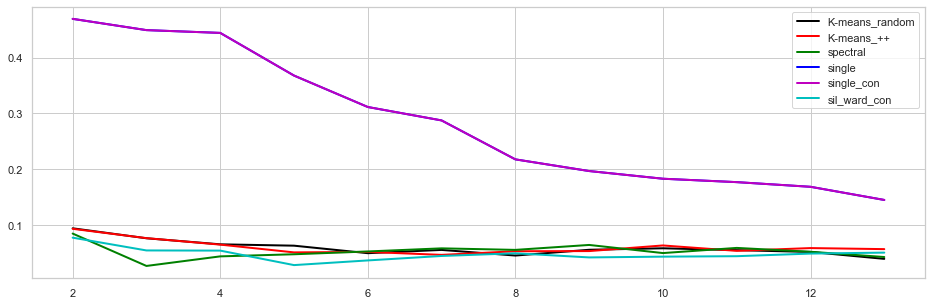

In [85]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')
plt.plot(np.arange(12)*1+2,sil_spectral.reshape(-1, 1),'g', label='spectral')
plt.plot(np.arange(12)*1+2,sil_single.reshape(-1, 1),'b', label='single')
plt.plot(np.arange(12)*1+2,sil_single_con.reshape(-1, 1),'m', label='single_con')
plt.plot(np.arange(12)*1+2,sil_ward_con.reshape(-1, 1),'c', label='sil_ward_con')


plt.legend()
fig=plt.gcf()
fig.set_size_inches((16,5))

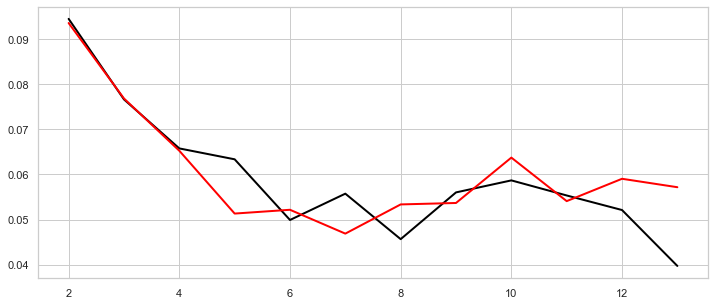

In [86]:
plt.plot(np.arange(12)*1+2,sil_kmeans_r.reshape(-1, 1),'black', label='K-means_random')
plt.plot(np.arange(12)*1+2,sil_kmeans_plus.reshape(-1, 1),'r', label='K-means_++')

PCA

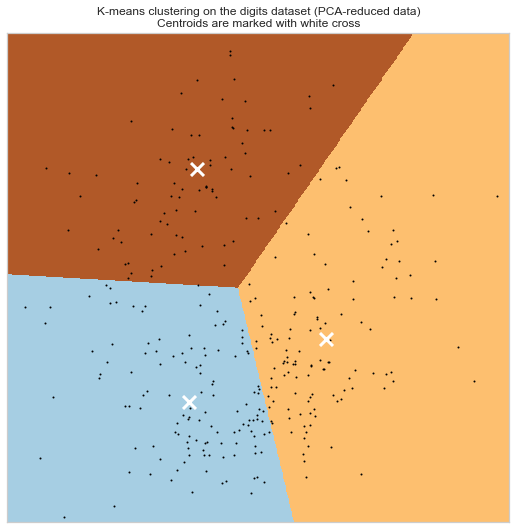

In [87]:
reduced_data = PCA(n_components=2).fit_transform(datanorm_ring)
kmeans = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

h = .02             

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches((9,9))

## 4.4 Modelos optimizados y clustering board

Como resultado de todo lo anterior, hemos obtenido que el modelo óptimo es, para todos los casos, usar el K-means. En *RegS* y en *ring* obtendremos 3 clusters, mientras que en *playoff* obtendremos 4 clusters.

### 4.4.1 Modelo *RegS* 

In [88]:
n_clusters_optimized = 3
random_state = 0

clustering_model_regs = cluster.KMeans(init='random', n_clusters=n_clusters_optimized, random_state=random_state)
clustering_model_regs.fit(datanorm_RegS)

path = './Models/'
filename = 'clustering_model_RegS'
pickle.dump(clustering_model_regs, open(path+filename, 'wb'))

In [89]:
pred_regs = clustering_model_regs.predict(datanorm_RegS)
regs_golden_record['Cluster'] = pred_regs
regs_golden_record['Cluster'] = regs_golden_record['Cluster'].astype('str')

In [90]:
regs_golden_record.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.0,0.3225,0.25,...,0.494000,0,0,0,0,60,195.58,23,0,1
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.0,0.5140,0.05,...,0.362625,0,0,0,0,37,200.66,23,0,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,3.0,0.3060,0.30,...,0.232000,0,0,0,0,-100,200.66,22,0,1
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.0,0.4320,0.00,...,0.317000,0,0,0,0,-100,200.66,25,0,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.0,0.5000,0.30,...,0.500000,0,0,0,0,-100,180.34,27,0,1


Visualizamos los clusters obtenidos

<AxesSubplot:>

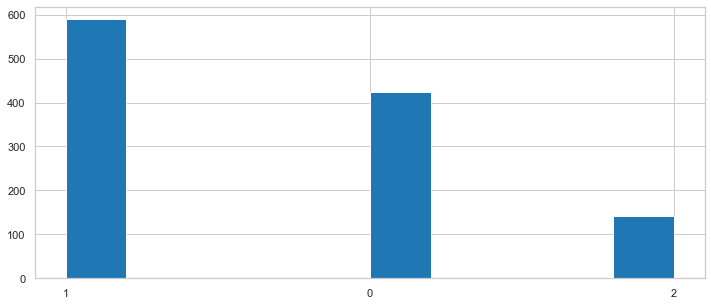

In [91]:
regs_golden_record['Cluster'].hist()

### 4.4.2 Modelo *Playoff*

In [92]:
n_clusters_optimized = 4
random_state = 0

clustering_model_playoff = cluster.KMeans(init='random', n_clusters=n_clusters_optimized, random_state=random_state)
clustering_model_playoff.fit(datanorm_playoff)

path = './Models/'
filename = 'clustering_model_playoff'
pickle.dump(clustering_model_playoff, open(path+filename, 'wb'))

In [93]:
pred_playoff = clustering_model_playoff.predict(datanorm_playoff)
playoff_golden_record['Cluster'] = pred_playoff

In [94]:
playoff_golden_record.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_DRB%_PLAYOFF_1stPO,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,1.8,5,0,1,PF,57.0,0.5,0.4835,0.00,...,18.9,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6,0
1,/players/a/abdulma02.html,3.0,3,0,1,PG,74.0,15.0,0.4170,0.40,...,5.0,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9,1
2,/players/a/abdulta01.html,2.0,5,0,1,SG,54.0,32.5,0.4190,0.10,...,15.7,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9,1
3,/players/a/abdursh01.html,2.8,5,0,3,PF,81.0,76.5,0.4690,0.20,...,22.9,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9,1
4,/players/a/abrinal01.html,3.0,1,0,1,SG,71.5,7.0,0.3940,1.25,...,10.0,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9,1


Asignamos los 4 clusters obtenidos a los números 3, 4, 5 y 6, para que no tengan el mismo identificador que los anteriores

In [95]:
playoff_golden_record['Cluster'] = playoff_golden_record['Cluster'].apply(lambda x: 3 if x==0 else 4 if x==1 else 5 if x==2 else 6)

Visualizamos los clusters obtenidos

<AxesSubplot:>

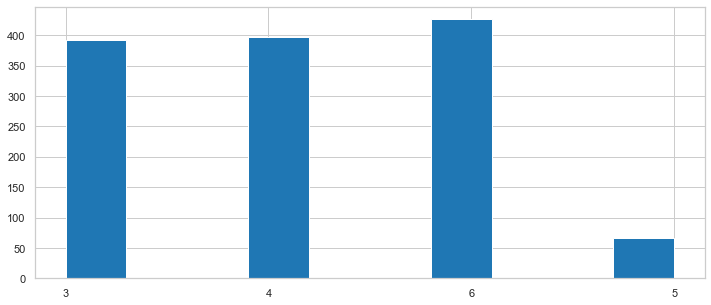

In [96]:
playoff_golden_record['Cluster'] = playoff_golden_record['Cluster'].astype('str')
playoff_golden_record['Cluster'].hist()

### 4.4.3 Modelo *Ring*

In [97]:
n_clusters_optimized = 3
random_state = 0

clustering_model_ring = cluster.KMeans(init='random', n_clusters=n_clusters_optimized, random_state=random_state)
clustering_model_ring.fit(datanorm_ring)

path = './Models/'
filename = 'clustering_model_ring'
pickle.dump(clustering_model_ring, open(path+filename, 'wb'))

In [98]:
pred_ring = clustering_model_ring.predict(datanorm_ring)
ring_golden_record['Cluster'] = pred_ring

In [99]:
ring_golden_record.head()

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,...,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_OFF_TEAM_RTG_SGFCT,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,...,9.85,16.05,112.65,112.65,108.100000,0,-100,23,0,0
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,...,11.50,21.50,110.75,101.05,108.450000,0,28,23,0,0
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,...,14.50,21.75,104.55,104.45,106.480000,0,-100,21,0,0
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,...,8.35,18.35,97.60,101.30,104.525000,0,-100,24,0,0
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,...,13.90,22.85,104.85,106.95,107.958824,0,5,22,0,2


Asignamos los 3 clusters obtenidos a los números 7, 8 y 9 para que no tengan el mismo identificador que los anteriores

In [100]:
ring_golden_record['Cluster'] = ring_golden_record['Cluster'].apply(lambda x: 7 if x==0 else 8 if x==1 else 9)
ring_golden_record['Cluster'] = ring_golden_record['Cluster'].astype('str')

Visualizamos los clusters obtenidos

<AxesSubplot:>

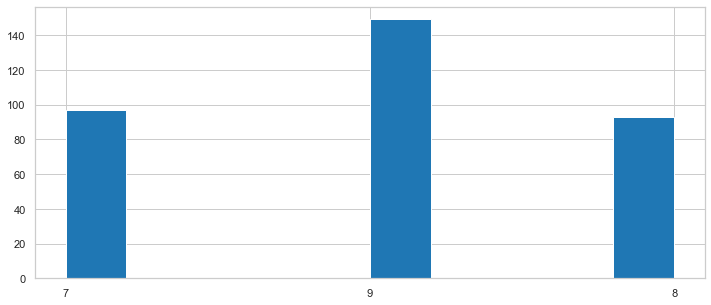

In [101]:
ring_golden_record['Cluster'].hist()

## 4.5 Nuevos dataframes con variables conjuntas

Construimos 5 dataframes que nos van a ayudar para determinar los perfiles de los jugadores de los 10 clusters resultantes

Recordamos las diferencias entre *RegS* (solo han jugado temporada regular, pero no playoff ni han ganado anillo), *playoff* (han jugado temporada regular y playoff, pero no han ganado anillo) y *ring* (han jugado temporada regular, playoff y han ganado anillo).

Por eso hay variables que se encuentran en los tres dataframes, hay otras que se encuentran en dos de ellos y hay otras que solo aparecen en uno. Hacemos estas agrupaciones para ayudarnos a hacer el profiling.

### 4.5.1 *common_three*

Primero, construimos un dataframe con las variables que aparecen en los 3 dataframes previos

In [102]:
common_playoff_ring = playoff_golden_record.columns.intersection(ring_golden_record.columns)
print(len(common_playoff_ring))

common_three = common_playoff_ring.intersection(regs_golden_record.columns)
print(len(common_three))

30
18


In [103]:
common_regs_df = regs_golden_record[[c for c in regs_golden_record.columns if c in common_three]]
common_regs_df.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.3225,0.250,14.0,23.65,110.65,102.70,0,60,23,0,1
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.5140,0.738,15.5,12.40,104.40,107.60,0,37,23,0,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,0.3060,1.000,13.7,9.90,107.70,117.60,0,-100,22,0,1
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.4320,0.581,10.6,16.45,106.85,107.95,0,-100,25,0,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.5000,0.000,0.0,20.30,105.90,106.50,0,-100,27,0,1


In [104]:
common_playoff_df = playoff_golden_record[[c for c in playoff_golden_record.columns if c in common_three]]
common_playoff_df.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/abdelal01.html,1.8,5,0,1,PF,57.0,0.4835,0.6600,14.00,21.35,112.10,104.25,0,25,23,0,3
1,/players/a/abdulma02.html,3.0,3,0,1,PG,74.0,0.4170,0.8635,10.55,26.95,102.95,111.65,0,3,22,0,4
2,/players/a/abdulta01.html,2.0,5,0,1,SG,54.0,0.4190,0.6815,13.30,20.55,101.75,105.00,0,11,24,0,4
3,/players/a/abdursh01.html,2.8,5,0,3,PF,81.0,0.4690,0.7650,13.55,28.00,102.20,111.90,0,3,21,0,4
4,/players/a/abrinal01.html,3.0,1,0,1,SG,71.5,0.3940,0.8730,7.85,14.30,109.50,107.35,0,-100,24,0,4


In [105]:
common_ring_df = ring_golden_record[[c for c in ring_golden_record.columns if c in common_three]]
common_ring_df.head()

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/adamsja01.html,1.000000,2,1,1,PG,20.5,0.2350,0.389,9.85,16.05,112.65,112.65,0,-100,23,0,7
1,/players/a/agerma01.html,1.500000,4,1,1,SG,29.0,0.3185,0.553,11.50,21.50,110.75,101.05,0,28,23,0,7
2,/players/a/ajincal01.html,1.800000,5,1,2,C,18.5,0.4310,0.357,14.50,21.75,104.55,104.45,0,-100,21,0,7
3,/players/a/allenma01.html,1.555556,9,1,1,PF,46.0,0.4275,0.801,8.35,18.35,97.60,101.30,0,-100,24,0,7
4,/players/a/allenra02.html,5.000000,4,2,1,SG,82.0,0.4290,0.849,13.90,22.85,104.85,106.95,0,5,22,0,9


In [106]:
three_common_df = common_regs_df.append(common_playoff_df).append(common_ring_df).reset_index(drop=True)
three_common_df

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.3225,0.2500,14.00,23.65,110.65,102.70,0,60,23,0,1
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.5140,0.7380,15.50,12.40,104.40,107.60,0,37,23,0,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,0.3060,1.0000,13.70,9.90,107.70,117.60,0,-100,22,0,1
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.4320,0.5810,10.60,16.45,106.85,107.95,0,-100,25,0,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.5000,0.0000,0.00,20.30,105.90,106.50,0,-100,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,/players/w/wrighan01.html,1.600000,5,1,2,SG,51.0,0.3980,0.5515,16.00,13.80,104.80,104.50,0,15,22,0,7
2771,/players/w/wrighde01.html,1.571429,7,1,3,PG,27.0,0.4360,0.7535,14.75,19.35,111.15,106.50,0,20,24,1,9
2772,/players/w/wrighdo01.html,2.750000,4,1,1,SF,11.5,0.3690,0.9410,21.25,23.75,109.45,103.80,0,19,20,0,7
2773,/players/w/wrighlo02.html,2.500000,6,1,1,C,73.0,0.4630,0.6230,11.85,15.05,104.20,109.40,0,7,22,0,8


Visualizamos los 10 clusters a la vez

<AxesSubplot:>

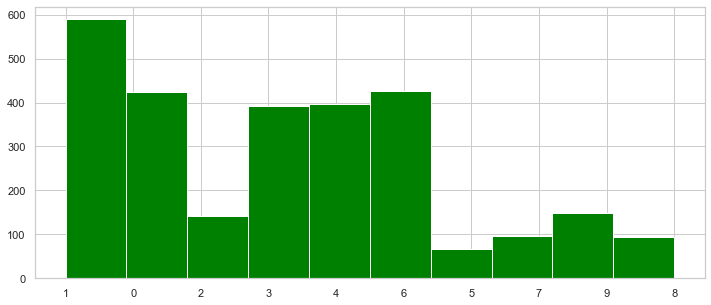

In [107]:
three_common_df['Cluster'].hist(bins=10,color='green')

### 4.5.2 *playoff_ring_common*

Construimos un dataframe con las variables que tienen en común *playoff* y *ring*, pero no *RegS*

In [108]:
ring_playoff_common_cols = [c for c in common_playoff_ring if c not in common_three]
ring_playoff_common_cols.append('URL')
ring_playoff_common_cols.append('Cluster')
ring_playoff_common_cols

['MEAN_G_PLAYOFF_1stPO',
 'MEAN_GS_PLAYOFF_1stPO',
 'MEAN_FG%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_FT%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_3P%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_FTr_PLAYOFF_1stPO',
 'MEAN_ORB%_PLAYOFF_1stPO',
 'MEAN_DRB%_PLAYOFF_1stPO',
 'MEAN_STL%_PLAYOFF_1stPO',
 'MEAN_TOV%_PLAYOFF_1stPO',
 'MEAN_USG%_PLAYOFF_1stPO',
 'MEAN_OWS_PLAYOFF_1stPO',
 'URL',
 'Cluster']

In [109]:
playoff_ring_common = playoff_golden_record[[c for c in playoff_golden_record.columns if c in ring_playoff_common_cols]]
playoff_ring_common.head()

,URL,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_3P%_PER_GAME_PLAYOFF_1stPO,MEAN_FTr_PLAYOFF_1stPO,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,5.0,0.0,0.333,0.000,0.000,0.000,8.8,18.9,0.0,0.0,19.8,0.0,3
1,/players/a/abdulma02.html,12.0,12.0,0.370,0.935,0.324,0.201,1.1,5.0,0.8,7.7,24.8,0.2,4
2,/players/a/abdulta01.html,5.0,5.0,0.455,0.813,0.000,0.485,6.9,15.7,2.2,7.0,20.0,0.3,4
3,/players/a/abdursh01.html,6.0,0.0,0.535,0.600,0.000,0.349,7.1,22.9,0.8,20.8,22.8,0.0,4
4,/players/a/abrinal01.html,5.0,0.0,0.348,0.750,0.294,0.174,2.6,10.0,0.0,0.0,13.3,0.1,4


In [110]:
ring_playoff_common = ring_golden_record[[c for c in ring_golden_record.columns if c in ring_playoff_common_cols]]
ring_playoff_common.head()

,URL,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_3P%_PER_GAME_PLAYOFF_1stPO,MEAN_FTr_PLAYOFF_1stPO,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,Cluster
0,/players/a/adamsja01.html,3.0,0.0,0.333,0.000,0.000,0.000,5.0,10.1,2.2,0.0,17.9,0.0,7
1,/players/a/agerma01.html,3.0,0.0,0.556,0.500,0.667,0.667,4.6,9.5,0.0,0.0,21.1,0.1,7
2,/players/a/ajincal01.html,3.0,0.0,1.000,0.000,0.000,0.000,0.0,10.9,5.2,0.0,18.3,0.1,7
3,/players/a/allenma01.html,10.0,0.0,0.449,0.667,0.000,0.184,10.0,15.0,0.8,7.0,19.8,0.2,7
4,/players/a/allenra02.html,3.0,3.0,0.532,0.615,0.474,0.277,8.1,14.0,1.4,17.3,25.3,0.4,9


In [111]:
Pff_ring_commmon_df = playoff_ring_common.append(ring_playoff_common).reset_index(drop=True)
Pff_ring_commmon_df

,URL,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_3P%_PER_GAME_PLAYOFF_1stPO,MEAN_FTr_PLAYOFF_1stPO,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,5.0,0.0,0.333,0.000,0.000,0.000,8.8,18.9,0.0,0.0,19.8,0.0,3
1,/players/a/abdulma02.html,12.0,12.0,0.370,0.935,0.324,0.201,1.1,5.0,0.8,7.7,24.8,0.2,4
2,/players/a/abdulta01.html,5.0,5.0,0.455,0.813,0.000,0.485,6.9,15.7,2.2,7.0,20.0,0.3,4
3,/players/a/abdursh01.html,6.0,0.0,0.535,0.600,0.000,0.349,7.1,22.9,0.8,20.8,22.8,0.0,4
4,/players/a/abrinal01.html,5.0,0.0,0.348,0.750,0.294,0.174,2.6,10.0,0.0,0.0,13.3,0.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,/players/w/wrighan01.html,5.0,0.0,0.250,0.667,0.000,0.750,0.0,0.0,0.0,0.0,25.5,0.0,7
1616,/players/w/wrighde01.html,9.0,0.0,0.300,0.615,0.000,1.300,2.8,9.3,3.9,11.3,20.0,0.0,9
1617,/players/w/wrighdo01.html,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,7
1618,/players/w/wrighlo02.html,3.0,3.0,0.406,1.000,0.000,0.156,8.5,23.0,1.8,2.8,18.4,0.1,8


### 4.5.3 *regs_non_common*

Construimos un dataframe con las variables del dataframe *RegS*, pero que no se encuentran en *playoff* ni *ring*

In [112]:
common_three = common_three.drop('URL')
common_three = common_three.drop('Cluster')
common_three

Index(['MEAN_N_SEASONS_X_TEAM', 'N_TEAMS', 'N_NBA_CHAMPION', 'N_POSITIONS',
       'COMMON_POSITION', 'MEAN_G_2S', 'MEAN_FG%_PER_GAME_2S',
       'MEAN_FT%_PER_GAME_2S', 'MEAN_TOV%_2S', 'MEAN_USG%_2S',
       'MEAN_OFF_TEAM_RTG_2S', 'MEAN_DEFF_TEAM_RTG_2S', 'ROY', 'DRAFT_PICK',
       'AGE_ENTRANCE', 'IS_ACTIVE'],
      dtype='object')

In [113]:
regs_non_common = regs_golden_record[[c for c in regs_golden_record.columns if c not in common_three]]
regs_non_common.head()

,URL,MEAN_GS_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_ORB_PER_GAME_2S,MEAN_AST_PER_GAME_2S,MEAN_STL_PER_GAME_2S,MEAN_BLK_PER_GAME_2S,MEAN_PF_PER_GAME_2S,MEAN_PER_2S,...,MEAN_W/L%_TEAM_2S,MEAN_GS_SGFCT,MEAN_OWS_SGFCT,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,HALL_OF_FAME,HEIGHT(cm),Cluster
0,/players/a/ackeral01.html,0.0,0.25,0.2750,0.25,0.65,0.2,0.10,0.60,4.00,...,0.768,0.000,-0.100,106.400,0.494000,0,0,0,195.58,1
1,/players/a/acyqu01.html,0.0,0.05,0.3835,1.05,0.40,0.4,0.45,1.85,13.00,...,0.360,7.625,0.700,105.325,0.362625,0,0,0,200.66,0
2,/players/a/adelde01.html,3.0,0.30,0.2610,0.20,0.30,0.1,0.20,0.70,2.70,...,0.232,3.000,-0.200,107.700,0.232000,0,0,0,200.66,1
3,/players/a/adrieje01.html,0.0,0.00,0.0000,0.80,0.25,0.1,0.25,1.40,11.25,...,0.477,7.250,0.925,102.750,0.317000,0,0,0,200.66,0
4,/players/a/akognjo01.html,0.0,0.30,0.5000,0.00,0.30,0.0,0.00,1.00,15.30,...,0.500,0.000,0.000,105.900,0.500000,0,0,0,180.34,1


### 4.5.4 *playoff_non_common*

Construimos un dataframe con las variables del dataframe *playoff*, pero que no se encuentran en *RegS* ni *ring*

In [114]:
ring_playoff_common_cols.remove('URL')
ring_playoff_common_cols.remove('Cluster')

ring_playoff_common_cols.extend(common_three)
other_cols = ring_playoff_common_cols
other_cols

['MEAN_G_PLAYOFF_1stPO',
 'MEAN_GS_PLAYOFF_1stPO',
 'MEAN_FG%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_FT%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_3P%_PER_GAME_PLAYOFF_1stPO',
 'MEAN_FTr_PLAYOFF_1stPO',
 'MEAN_ORB%_PLAYOFF_1stPO',
 'MEAN_DRB%_PLAYOFF_1stPO',
 'MEAN_STL%_PLAYOFF_1stPO',
 'MEAN_TOV%_PLAYOFF_1stPO',
 'MEAN_USG%_PLAYOFF_1stPO',
 'MEAN_OWS_PLAYOFF_1stPO',
 'MEAN_N_SEASONS_X_TEAM',
 'N_TEAMS',
 'N_NBA_CHAMPION',
 'N_POSITIONS',
 'COMMON_POSITION',
 'MEAN_G_2S',
 'MEAN_FG%_PER_GAME_2S',
 'MEAN_FT%_PER_GAME_2S',
 'MEAN_TOV%_2S',
 'MEAN_USG%_2S',
 'MEAN_OFF_TEAM_RTG_2S',
 'MEAN_DEFF_TEAM_RTG_2S',
 'ROY',
 'DRAFT_PICK',
 'AGE_ENTRANCE',
 'IS_ACTIVE']

In [115]:
playoff_non_common = playoff_golden_record[[c for c in playoff_golden_record.columns if c not in other_cols]]
playoff_non_common.head()

,URL,MEAN_GS_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_ORB_PER_GAME_2S,MEAN_AST_PER_GAME_2S,MEAN_FTr_2S,MEAN_ORB%_2S,MEAN_DRB%_2S,MEAN_STL%_2S,...,MEAN_DBPM_2S,MEAN_W/L%_TEAM_SGFCT,ALL_STAR,HALL_OF_FAME,N_PLAYOFFS,MEAN_AST%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,0.5,0.00,0.0000,0.85,0.35,0.3295,9.95,22.15,1.00,...,-0.80,0.553600,0,0,3,0.0,0.0,-2.6,-4.6,3
1,/players/a/abdulma02.html,15.0,0.40,0.2850,0.40,2.75,0.1125,1.70,6.40,1.45,...,-2.45,0.404286,0,0,2,18.0,0.2,-0.8,-1.9,4
2,/players/a/abdulta01.html,32.5,0.10,0.2485,1.10,0.95,0.3420,5.65,9.25,2.00,...,-0.85,0.480333,0,0,2,8.1,2.8,2.6,1.9,4
3,/players/a/abdursh01.html,76.5,0.20,0.3355,2.75,2.40,0.4515,8.85,14.00,1.55,...,-1.95,0.332333,1,0,1,10.2,0.0,-3.5,-1.9,4
4,/players/a/abrinal01.html,7.0,1.25,0.3805,0.30,0.50,0.1510,2.20,8.00,1.70,...,0.00,0.579000,0,0,2,7.1,0.0,-2.8,-1.9,4


### 4.5.5 *ring_non_common*

Construimos un dataframe con las variables del dataframe *ring*, pero que no se encuentran en *RegS* ni *playoff*

In [116]:
ring_non_common = ring_golden_record[[c for c in ring_golden_record.columns if c not in other_cols]]
ring_non_common.head()

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,MEAN_STL%_RING,MEAN_TOV%_RING,MEAN_USG%_RING,MEAN_DBPM_RING,MEAN_OFF_TEAM_RTG_RING,MEAN_W/L%_TEAM_RING,MEAN_G_PLAYOFF_SGFCT,MEAN_BLK%_2S,MEAN_OFF_TEAM_RTG_SGFCT,Cluster
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,0.0,0.00,18.60,-4.6,117.20,0.639,3.000000,0.50,108.100000,7
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,0.0,7.90,21.30,-4.2,110.20,0.805,3.000000,0.75,108.450000,7
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,2.1,2.90,21.40,0.5,109.70,0.695,3.000000,2.70,106.480000,7
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,0.9,11.70,16.10,0.0,110.20,0.805,7.000000,3.20,104.525000,7
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,1.5,11.45,20.45,-0.3,111.25,0.805,15.545455,0.30,107.958824,9


## 4.6 Analizar los custers, construir los perfiles

Hay que describir los diferentes clusters teniendo en cuenta las variables de los distintos Dataframe que los caracterizan

Definimos algunas funciones que nos van a ayudar a pintar las distribuciones

In [117]:
def paint_num_dist(col,DATA):
    sns.boxplot(x="Cluster", y=col, data=DATA)
    plt.show()

In [118]:
def group_catvars(col, n_max=9, misc_label='Other'):
        """
        Function to group sparse categories into an Other label
        :param col: pd.Series / Categorical / Object series to group
        :param n_max: int / maximum number of stand-alone categories to keep, default = 9
        :param misc_label: str / Label to assign to the grouped category, default = 'Other'
        """
        cols_to_keep = col.value_counts().index[:n_max]
        return  np.where(col.isin(cols_to_keep), col, misc_label)

In [119]:
def plot_cluster_distributions(df_clus, var_x='Cluster', var_hue='', sort=True , save_plot=False, _name='model', n_max=9):
        """
        Function to plot normalized stacked distribution of clusters with one variable
        :param df_clus: DataFrame with a column labelled 'cluster'
        :param var_x: str / Var to plot in the X axis, default = 'cluster'
        :param var_hue: str / Var to plot the stacked distribution as a hue
        :param sort: bool (default : True)  / Whether to sort columns
        :param save_plot: False/str  (default : False) / If not False, folder to save the plot 
        :param _name: str  (default : 'model') / Prefix of the files to be saved
        """   
        df_plot = df_clus[[var_hue, var_x, df_clus.columns[1]]].copy() 
        n_clus = df_clus['Cluster'].nunique()

        if (var_x != 'Cluster'):    df_plot[var_x]   = group_catvars(df_plot[var_x],    n_max, misc_label='Other')
        if (var_hue  != 'Cluster'): df_plot[var_hue] = group_catvars(df_plot[var_hue],  n_max, misc_label='Other')

        plt.figure(figsize= (20,7) )
        ax = plt.gca()
        if (df_plot[var_hue].nunique() <=20): 
            colors = plt.cm.get_cmap('tab20').colors
        else: colors = sns.color_palette("hls", df_plot[var_hue].nunique()+3)
            
        df_plot2 = df_plot.pivot_table(index=var_x, values= df_plot.columns[2], columns=var_hue, aggfunc='count')\
            .divide(df_plot[var_x].value_counts(), axis=0)
        
        if(sort):  df_plot2 = df_plot2.reindex(df_plot['Cluster'].value_counts().index)
            
        df_plot2.plot(kind='bar', stacked=True, ax=ax, rot=0, color=colors)
        if(var_x=='Cluster'): plt.xticks(range(n_clus), df_plot2.index);
        plt.xlabel(var_x);plt.title(var_hue);
        #Plotting.autolabel(ax, prop=True, values= df_plot.groupby([var_hue, var_x]).count().dropna()[df_clus.columns[1]].values)
        if (save_plot):
            os.makedirs(save_plot, exist_ok=True)
            plt.savefig(save_plot+'/'+_name+'_'+var_x+'_'+var_hue+'.png', format="png")

### 4.6.1 Análisis de las columnas comunes 

In [120]:
three_common_df.columns

Index(['URL', 'MEAN_N_SEASONS_X_TEAM', 'N_TEAMS', 'N_NBA_CHAMPION',
       'N_POSITIONS', 'COMMON_POSITION', 'MEAN_G_2S', 'MEAN_FG%_PER_GAME_2S',
       'MEAN_FT%_PER_GAME_2S', 'MEAN_TOV%_2S', 'MEAN_USG%_2S',
       'MEAN_OFF_TEAM_RTG_2S', 'MEAN_DEFF_TEAM_RTG_2S', 'ROY', 'DRAFT_PICK',
       'AGE_ENTRANCE', 'IS_ACTIVE', 'Cluster'],
      dtype='object')

Análisis de la distribución por clusters de las variables numéricas. Algunas variables las revisamos y las analizamos más en profunidad más abajo

In [121]:
stats = three_common_df.groupby('Cluster').describe()
stats.to_excel('./Models/Statistics/Three_common_GR_statistics.xlsx')

for i in three_common_df.columns:
    if three_common_df[i].dtype!='object':
        print(i, '\n',stats[i], '\n')

MEAN_N_SEASONS_X_TEAM 
          count      mean       std  min       25%       50%       75%   max
Cluster                                                                    
0        424.0  1.261843  0.489308  1.0  1.000000  1.000000  1.333333   4.0
1        589.0  1.164880  0.349181  1.0  1.000000  1.000000  1.000000   3.0
2        142.0  1.927691  0.949256  1.0  1.050000  2.000000  2.000000   6.0
3        392.0  2.330755  1.198818  1.0  1.600000  2.000000  2.762500  13.0
4        397.0  2.586674  1.157769  1.0  1.818182  2.300000  3.000000   8.0
5         66.0  4.926942  3.073403  1.0  3.000000  4.000000  5.583333  18.0
6        426.0  1.775141  0.796524  1.0  1.250000  1.600000  2.000000   9.0
7         97.0  1.876739  0.857014  1.0  1.333333  1.666667  2.000000   7.0
8         93.0  3.092545  2.842811  1.2  1.857143  2.500000  3.000000  19.0
9        149.0  3.706246  2.981699  1.4  2.166667  2.800000  3.750000  21.0 

N_TEAMS 
          count      mean       std  min  25%  50%  7

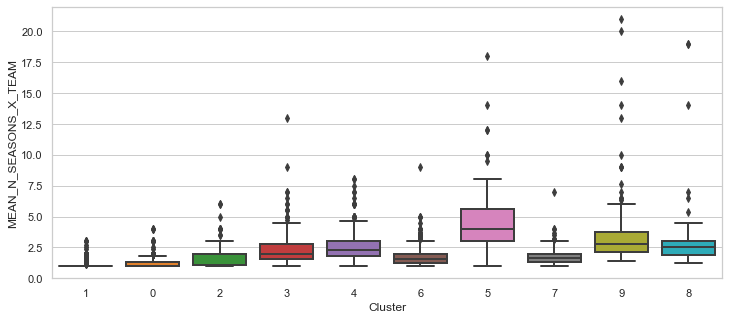

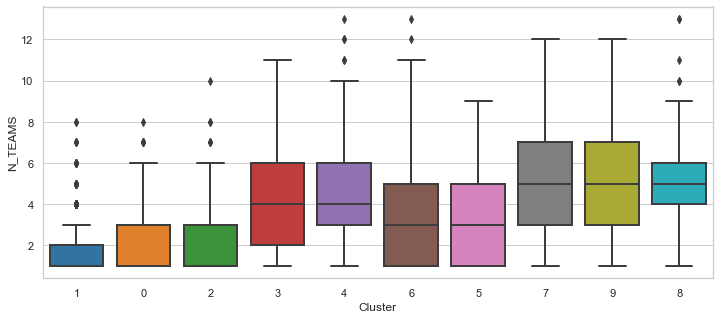

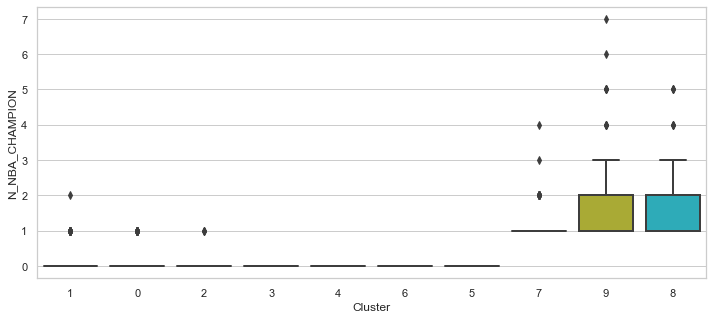

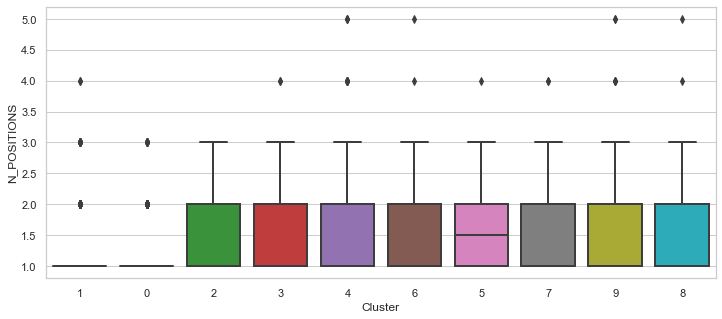

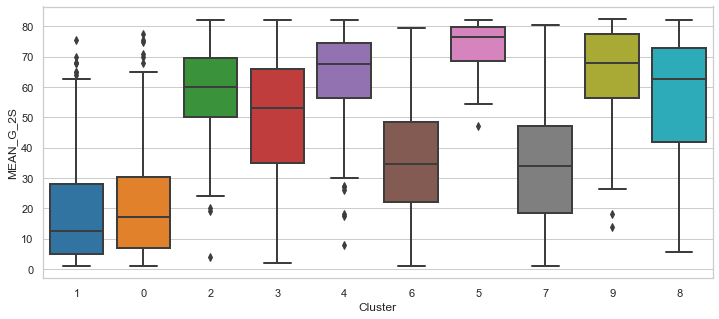

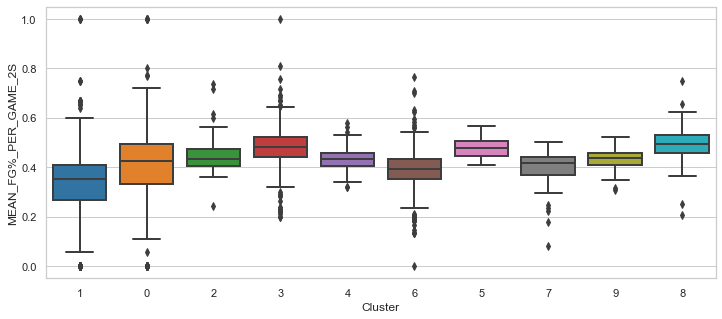

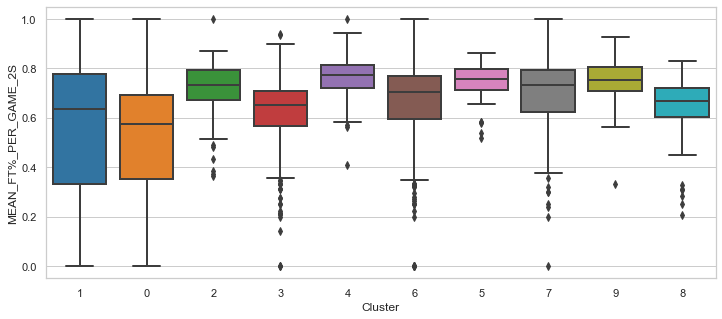

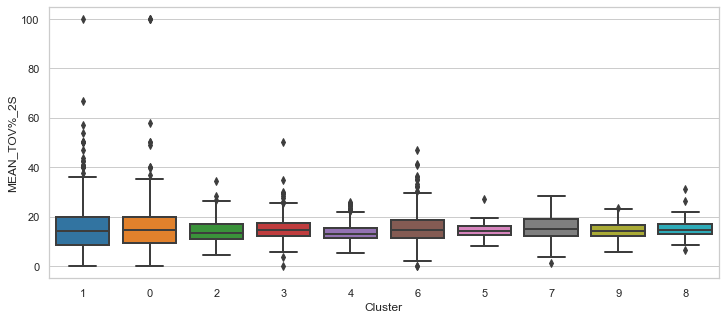

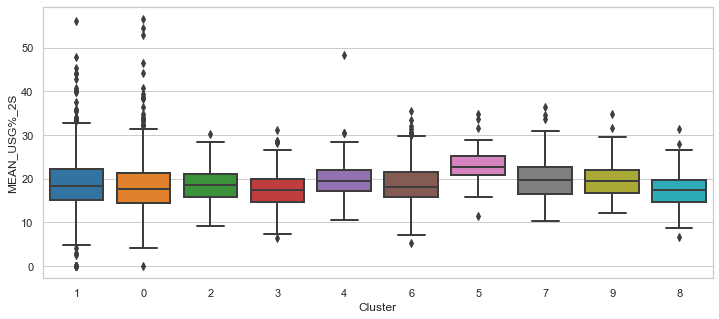

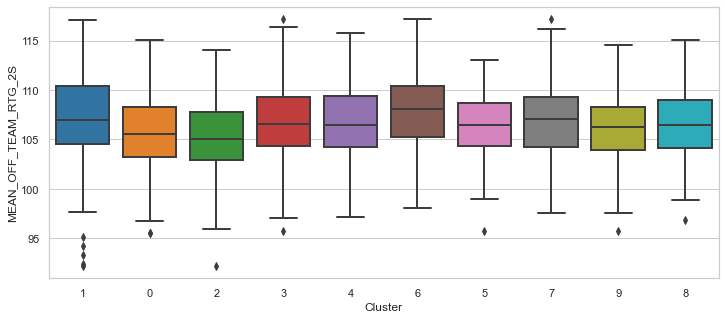

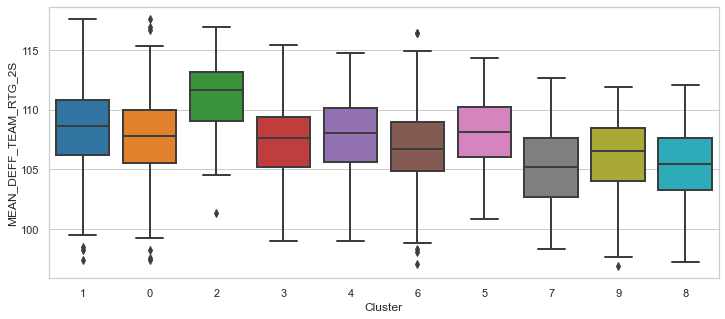

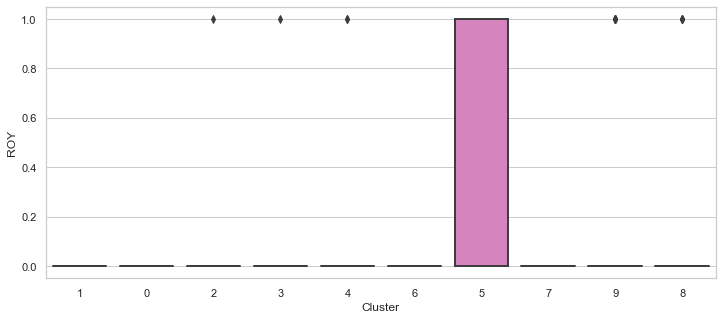

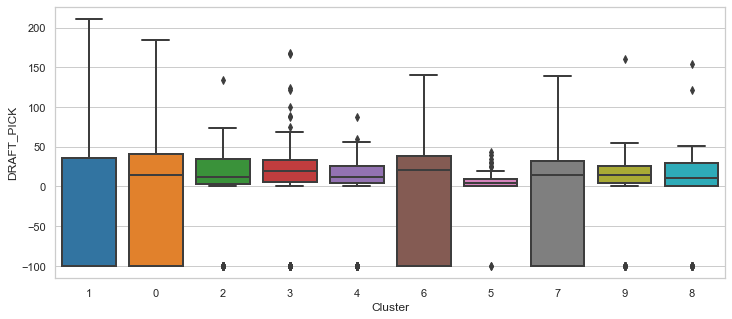

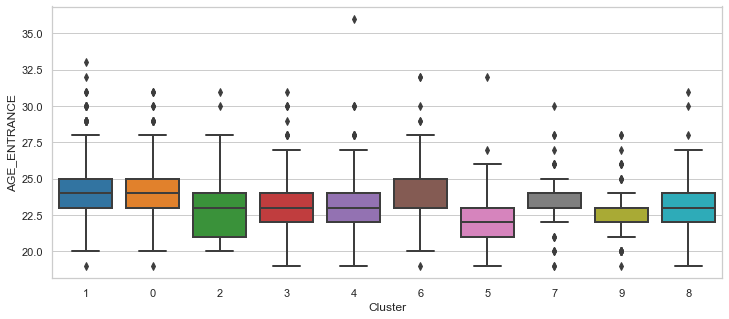

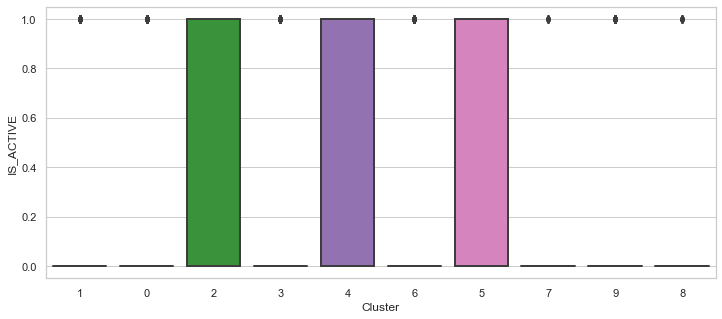

In [122]:
for i in three_common_df.columns:
    if three_common_df[i].dtype!='object':
        paint_num_dist(i,three_common_df)

Análisis de la distribución por clusters de la variable *COMMON_POSITION*

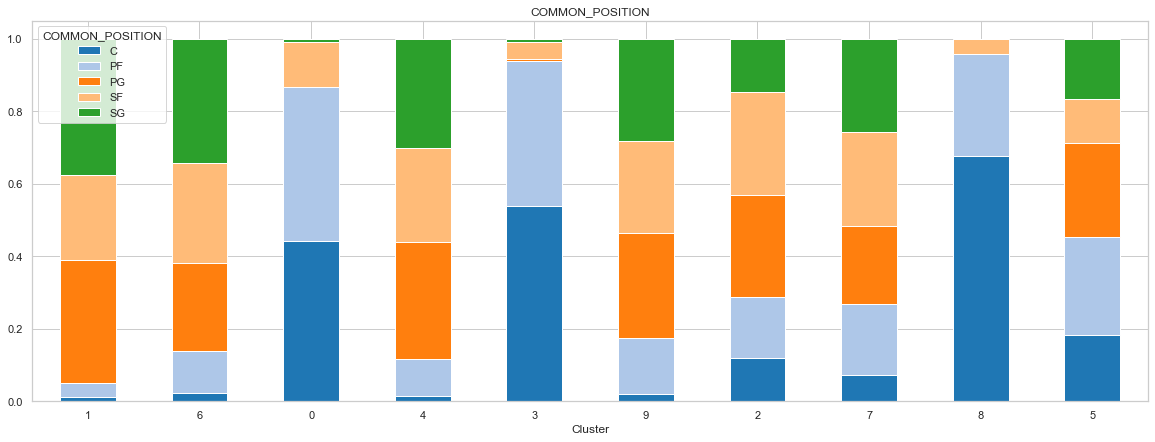

In [123]:
for i in three_common_df.columns:
    if three_common_df[i].dtype=='object' and i!='URL' and i!='Cluster':
        #print(i)
        plot_cluster_distributions(three_common_df, var_x='Cluster', var_hue=i, sort=True , save_plot=False, _name='model', n_max=10) 

Análisis de la variable *IS_ACTIVE*

In [124]:
active_df = three_common_df[['Cluster','IS_ACTIVE']].groupby('Cluster').agg({'IS_ACTIVE':['sum','count']})

In [125]:
active_df['IS_ACTIVE_%'] = (active_df['IS_ACTIVE']['sum']/active_df['IS_ACTIVE']['count'])*100

In [126]:
active_df

IS_ACTIVE       IS_ACTIVE_%
              sum count            
Cluster                            
0              31   424    7.311321
1             107   589   18.166384
2              68   142   47.887324
3              68   392   17.346939
4             151   397   38.035264
5              24    66   36.363636
6              91   426   21.361502
7              10    97   10.309278
8              11    93   11.827957
9              36   149   24.161074

Análisis concreto de la variable *ROY*.

Recordemos que *ROY* indica si el jugador ha recibido el premio del mejor *rookie* (jugador de primer año) de la temporada

In [127]:
ROY_df = three_common_df[['Cluster','ROY']].groupby('Cluster').agg({'ROY':['sum','count'],})

In [129]:
ROY_df['ROY_%'] = ROY_df['ROY']['sum']/ROY_df['ROY']['count']

In [131]:
ROY_df

ROY           ROY_%
        sum count          
Cluster                    
0         0   424  0.000000
1         0   589  0.000000
2         1   142  0.007042
3         1   392  0.002551
4         2   397  0.005038
5        24    66  0.363636
6         0   426  0.000000
7         0    97  0.000000
8         4    93  0.043011
9         7   149  0.046980

Revisamos y analizamos la variable *DRAFT_PICK*, para obtener cuántos jugadores de cada cluster fueron seleccionados en el draft y en qué posición fueron elegidos

In [132]:
draft_df = three_common_df[['Cluster','DRAFT_PICK']]
draft_df['Drafted'] = draft_df['DRAFT_PICK'].apply(lambda x: 1 if x!=-100 else 0)
draft_gb = draft_df.groupby('Cluster').agg({'Drafted':['sum','count']})
draft_gb['Drafted_%'] = (draft_gb['Drafted']['sum']/draft_gb['Drafted']['count'])*100
draft_gb

Drafted        Drafted_%
            sum count           
Cluster                         
0           229   424  54.009434
1           248   589  42.105263
2           115   142  80.985915
3           323   392  82.397959
4           319   397  80.352645
5            64    66  96.969697
6           280   426  65.727700
7            58    97  59.793814
8            74    93  79.569892
9           132   149  88.590604

In [133]:
drafted_picks = draft_df[draft_df['Drafted']==1][['Cluster','DRAFT_PICK']].groupby('Cluster').mean()
drafted_picks

,DRAFT_PICK
Cluster,
0,41.772926
1,42.447581
2,23.313043
3,27.442724
4,20.463950
5,8.250000
6,34.989286
7,32.275862
8,22.675676


### 4.6.2 Análisis de las columnas comunes en *playoff* y *ring*

In [134]:
Pff_ring_commmon_df

,URL,MEAN_G_PLAYOFF_1stPO,MEAN_GS_PLAYOFF_1stPO,MEAN_FG%_PER_GAME_PLAYOFF_1stPO,MEAN_FT%_PER_GAME_PLAYOFF_1stPO,MEAN_3P%_PER_GAME_PLAYOFF_1stPO,MEAN_FTr_PLAYOFF_1stPO,MEAN_ORB%_PLAYOFF_1stPO,MEAN_DRB%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,5.0,0.0,0.333,0.000,0.000,0.000,8.8,18.9,0.0,0.0,19.8,0.0,3
1,/players/a/abdulma02.html,12.0,12.0,0.370,0.935,0.324,0.201,1.1,5.0,0.8,7.7,24.8,0.2,4
2,/players/a/abdulta01.html,5.0,5.0,0.455,0.813,0.000,0.485,6.9,15.7,2.2,7.0,20.0,0.3,4
3,/players/a/abdursh01.html,6.0,0.0,0.535,0.600,0.000,0.349,7.1,22.9,0.8,20.8,22.8,0.0,4
4,/players/a/abrinal01.html,5.0,0.0,0.348,0.750,0.294,0.174,2.6,10.0,0.0,0.0,13.3,0.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,/players/w/wrighan01.html,5.0,0.0,0.250,0.667,0.000,0.750,0.0,0.0,0.0,0.0,25.5,0.0,7
1616,/players/w/wrighde01.html,9.0,0.0,0.300,0.615,0.000,1.300,2.8,9.3,3.9,11.3,20.0,0.0,9
1617,/players/w/wrighdo01.html,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,7
1618,/players/w/wrighlo02.html,3.0,3.0,0.406,1.000,0.000,0.156,8.5,23.0,1.8,2.8,18.4,0.1,8


Análisis de la distribución por clusters de las variables numéricas (las únicas que no son numéricas son *URL* y *Cluster*)

In [135]:
stats = Pff_ring_commmon_df.groupby('Cluster').describe()
stats.to_excel('./Models/Statistics/Playoff_ring_common_GR_statistics.xlsx')

for i in Pff_ring_commmon_df.columns:
    if Pff_ring_commmon_df[i].dtype!='object':
        print(i, '\n',stats[i], '\n')

MEAN_G_PLAYOFF_1stPO 
          count      mean       std  min   25%  50%   75%   max
Cluster                                                       
3        392.0  5.155612  3.869187  1.0  3.00  4.0   7.0  24.0
4        397.0  7.282116  4.338110  1.0  4.00  6.0  10.0  23.0
5         66.0  8.545455  5.057156  3.0  4.25  7.0  11.0  22.0
6        426.0  3.847418  2.868524  1.0  2.00  3.0   5.0  22.0
7         97.0  4.814433  3.069778  1.0  3.00  4.0   6.0  17.0
8         93.0  7.806452  5.244579  1.0  4.00  6.0  10.0  23.0
9        149.0  9.677852  5.893501  1.0  5.00  9.0  13.0  26.0 

MEAN_GS_PLAYOFF_1stPO 
          count      mean       std  min  25%  50%   75%   max
Cluster                                                      
3        392.0  1.112245  2.588120  0.0  0.0  0.0   0.0  16.0
4        397.0  2.541562  4.015300  0.0  0.0  0.0   4.0  22.0
5         66.0  8.075758  5.421639  0.0  4.0  6.0  11.0  22.0
6        426.0  0.140845  0.775431  0.0  0.0  0.0   0.0   7.0
7         97

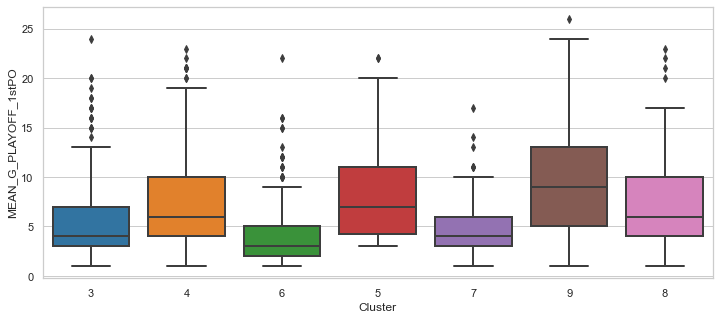

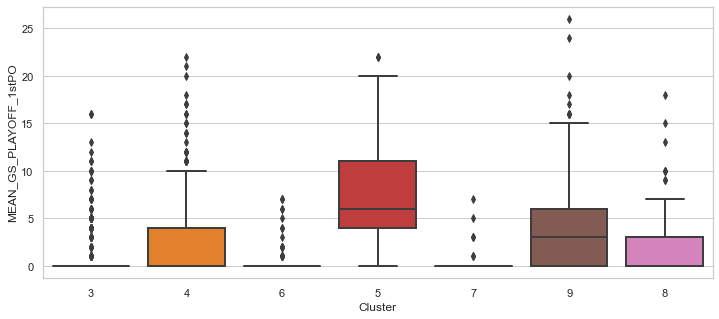

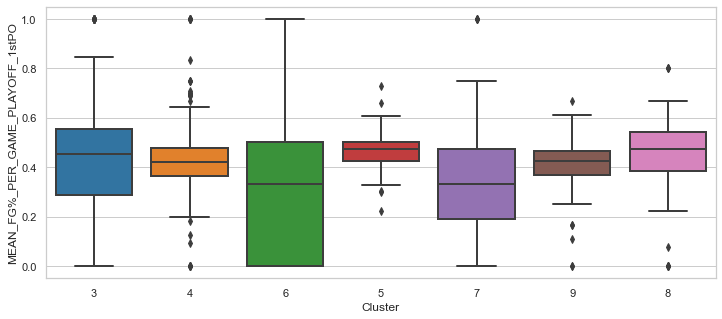

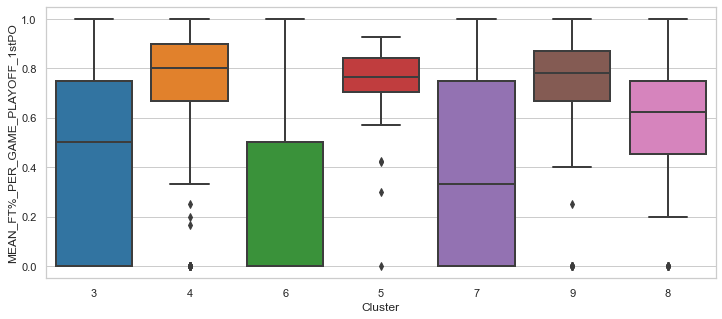

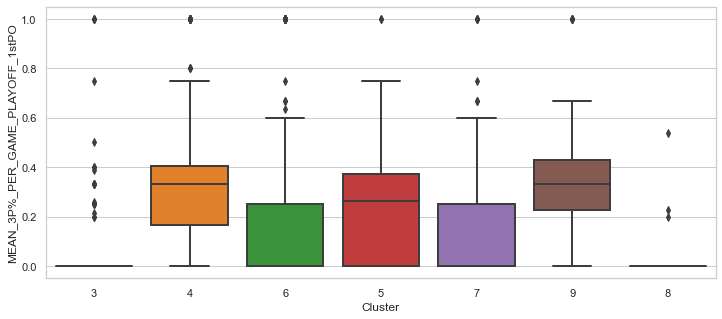

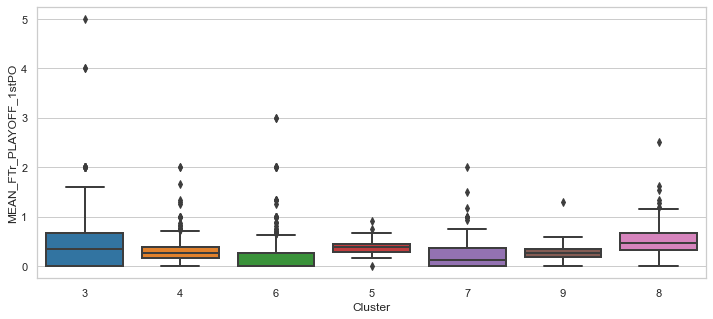

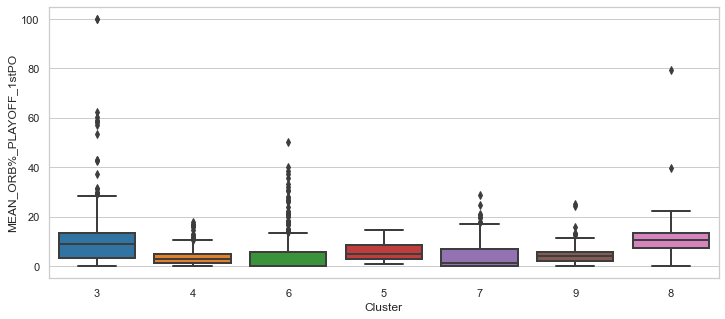

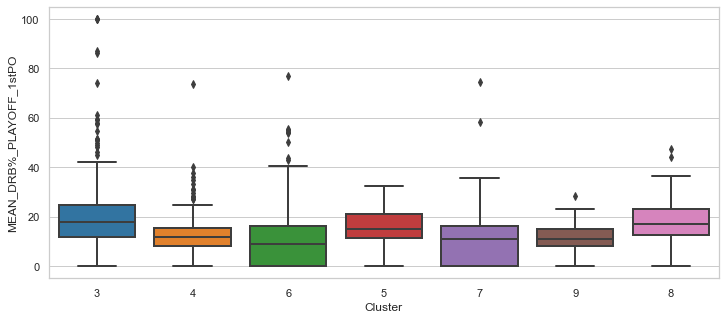

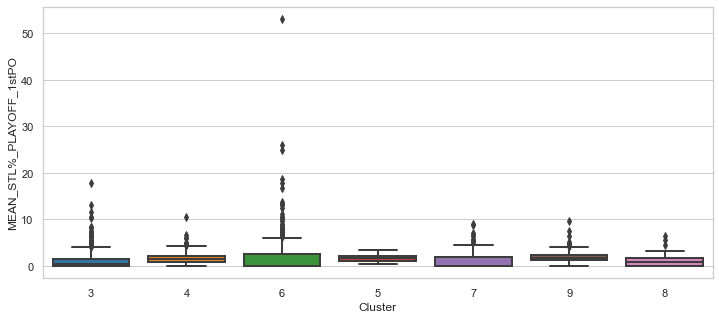

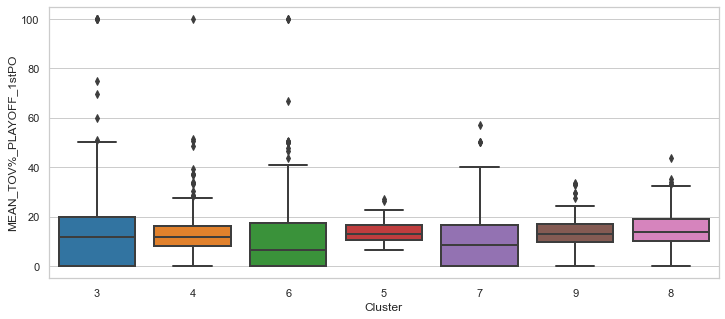

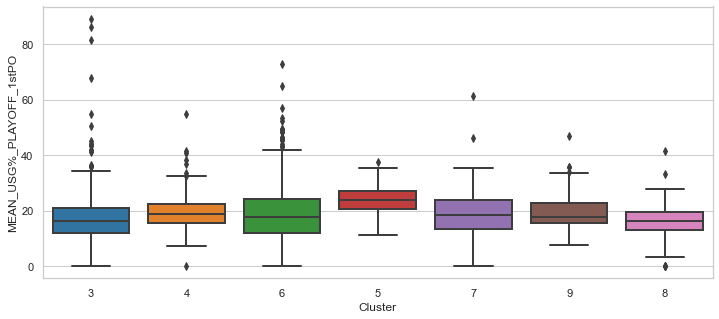

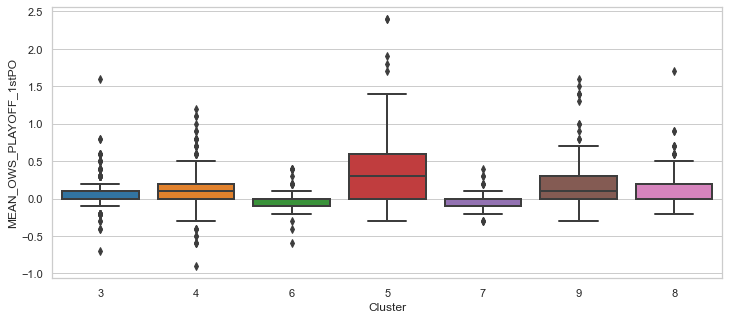

In [136]:
for i in Pff_ring_commmon_df.columns:
    if Pff_ring_commmon_df[i].dtype!='object':
        paint_num_dist(i,Pff_ring_commmon_df)

### 4.6.3 Análisis de las columnas no comunes de *RegS*

In [137]:
regs_non_common

,URL,MEAN_GS_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_ORB_PER_GAME_2S,MEAN_AST_PER_GAME_2S,MEAN_STL_PER_GAME_2S,MEAN_BLK_PER_GAME_2S,MEAN_PF_PER_GAME_2S,MEAN_PER_2S,...,MEAN_W/L%_TEAM_2S,MEAN_GS_SGFCT,MEAN_OWS_SGFCT,MEAN_OFF_TEAM_RTG_SGFCT,MEAN_W/L%_TEAM_SGFCT,ALL-ROOKIE,ALL_STAR,HALL_OF_FAME,HEIGHT(cm),Cluster
0,/players/a/ackeral01.html,0.0,0.25,0.2750,0.25,0.65,0.2,0.10,0.60,4.00,...,0.7680,0.000000,-0.100000,106.400000,0.494000,0,0,0,195.58,1
1,/players/a/acyqu01.html,0.0,0.05,0.3835,1.05,0.40,0.4,0.45,1.85,13.00,...,0.3600,7.625000,0.700000,105.325000,0.362625,0,0,0,200.66,0
2,/players/a/adelde01.html,3.0,0.30,0.2610,0.20,0.30,0.1,0.20,0.70,2.70,...,0.2320,3.000000,-0.200000,107.700000,0.232000,0,0,0,200.66,1
3,/players/a/adrieje01.html,0.0,0.00,0.0000,0.80,0.25,0.1,0.25,1.40,11.25,...,0.4770,7.250000,0.925000,102.750000,0.317000,0,0,0,200.66,0
4,/players/a/akognjo01.html,0.0,0.30,0.5000,0.00,0.30,0.0,0.00,1.00,15.30,...,0.5000,0.000000,0.000000,105.900000,0.500000,0,0,0,180.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,/players/y/yuesu01.html,0.0,0.00,0.0000,0.00,0.20,0.1,0.10,1.00,-8.60,...,0.7930,0.000000,-0.200000,112.800000,0.793000,0,0,0,205.74,1
1151,/players/z/zellelu01.html,0.0,0.10,0.2000,0.10,0.20,0.0,0.00,0.30,5.60,...,0.3050,0.000000,-0.100000,101.200000,0.305000,0,0,0,210.82,0
1152,/players/z/zidekge01.html,11.5,0.00,0.0000,0.85,0.25,0.1,0.10,1.80,9.10,...,0.3415,8.333333,0.033333,108.666667,0.447333,0,0,0,213.36,0
1153,/players/z/zimmede01.html,0.0,0.00,0.0000,0.50,3.50,0.0,0.00,2.00,5.50,...,0.5980,0.000000,0.000000,103.900000,0.598000,0,0,0,190.50,1


Análisis de la distribución por clusters de las variables numéricas (las únicas que no son numéricas son *URL* y *Cluster*)

In [138]:
stats = regs_non_common.groupby('Cluster').describe()
stats.to_excel('./Models/Statistics/RegS_non_common_GR_statistics.xlsx')

for i in regs_non_common.columns:
    if regs_non_common[i].dtype!='object':
        print(i, '\n', stats[i], '\n')

MEAN_GS_2S 
          count       mean        std  min   25%    50%     75%   max
Cluster                                                             
0        424.0   2.205189   4.488137  0.0   0.0   0.00   2.000  27.0
1        589.0   1.189304   2.755836  0.0   0.0   0.00   1.000  23.5
2        142.0  28.091549  18.722462  0.5  13.0  22.75  39.375  79.0 

MEAN_3P_PER_GAME_2S 
          count      mean       std  min   25%  50%  75%   max
Cluster                                                      
0        424.0  0.045165  0.121919  0.0  0.00  0.0  0.0  0.75
1        589.0  0.276740  0.336211  0.0  0.00  0.2  0.4  2.10
2        142.0  0.712676  0.610645  0.0  0.15  0.7  1.1  2.55 

MEAN_3P%_PER_GAME_2S 
          count      mean       std  min     25%     50%      75%    max
Cluster                                                                
0        424.0  0.072573  0.152859  0.0  0.0000  0.0000  0.05825  1.000
1        589.0  0.213352  0.188095  0.0  0.0000  0.2220  0.32450  1

          count        mean       std     min     25%     50%     75%     max
Cluster                                                                     
0        424.0  207.860660  4.995903  195.58  203.20  208.28  210.82  226.06
1        589.0  194.169847  6.740958  175.26  190.50  195.58  198.12  213.36
2        142.0  198.602958  8.646342  177.80  193.04  198.12  205.74  213.36 



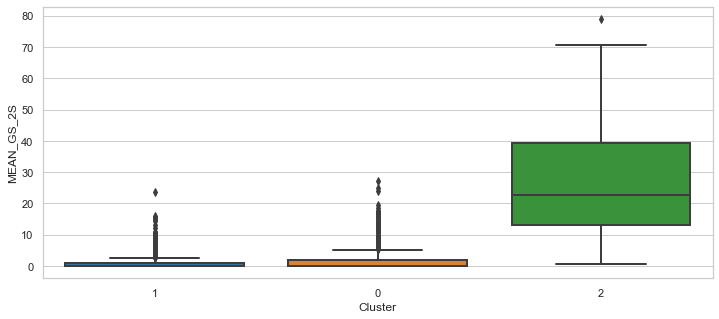

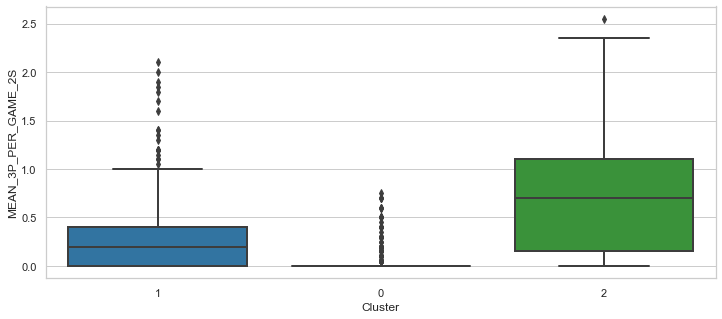

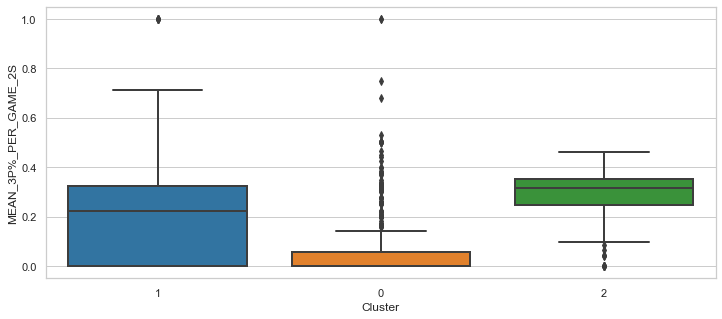

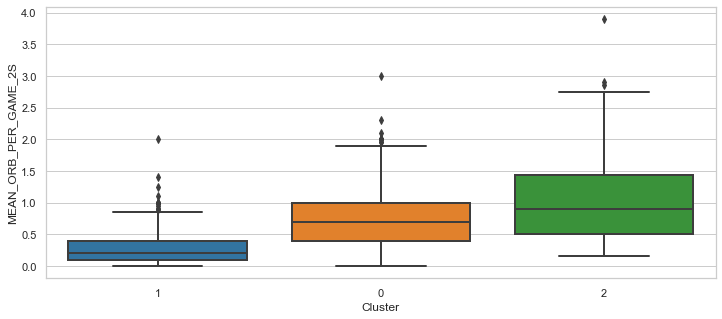

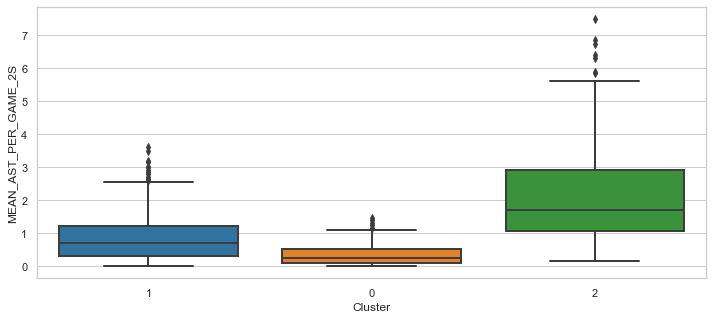

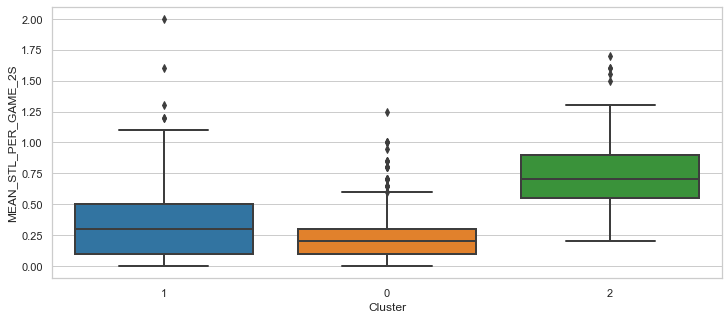

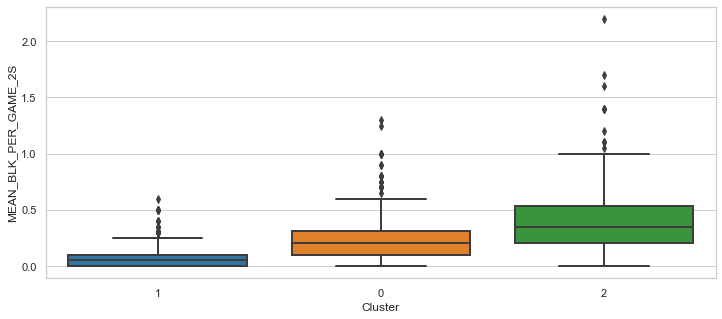

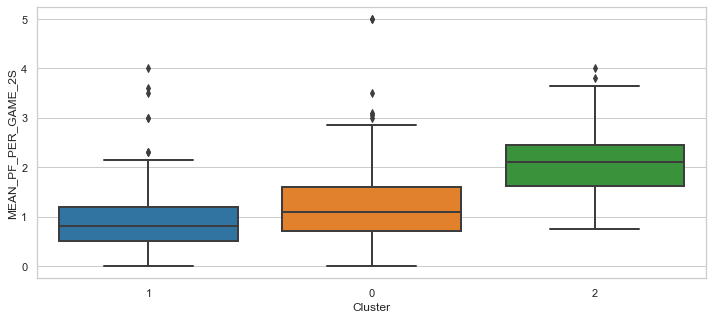

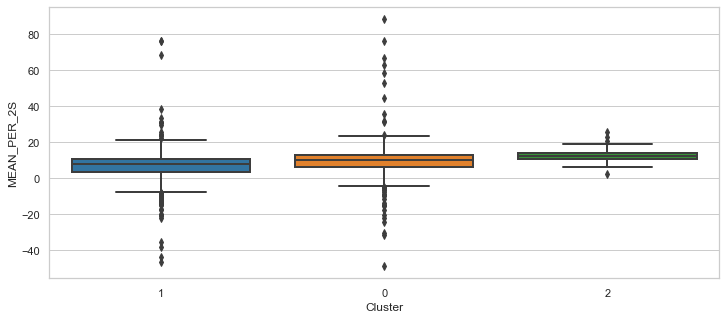

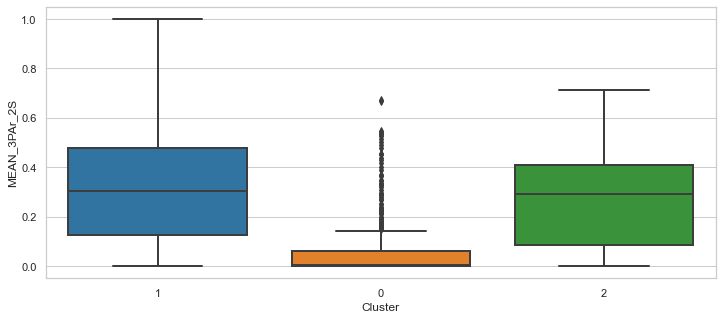

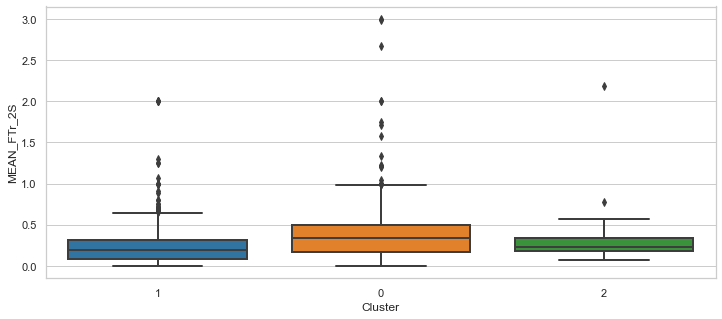

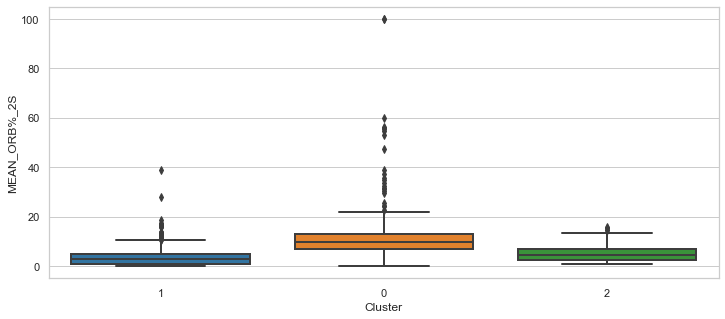

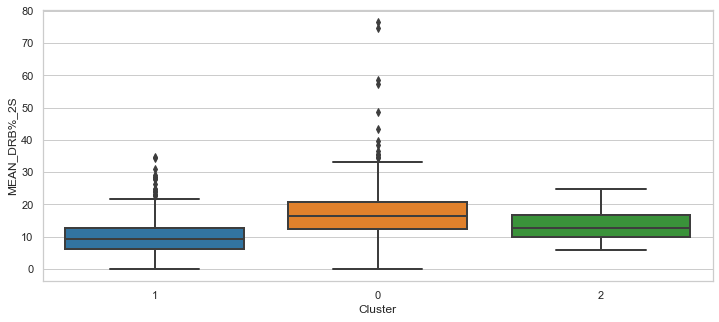

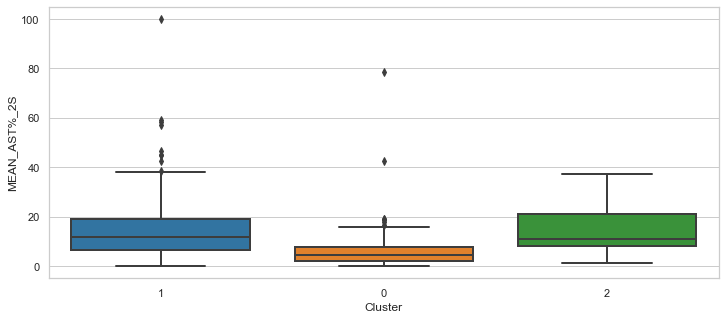

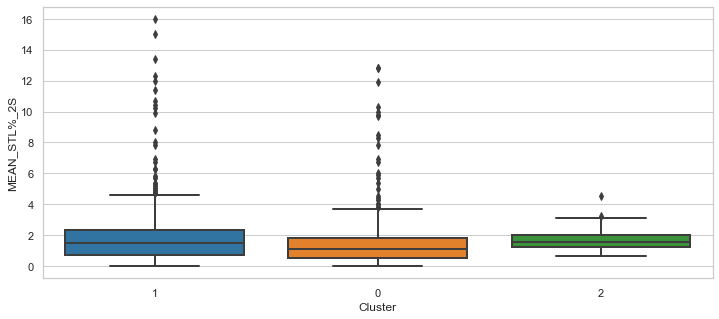

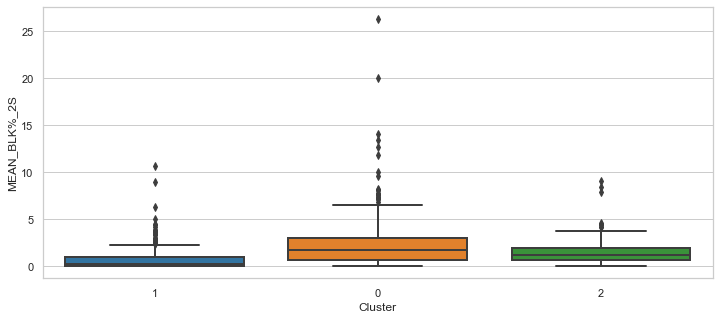

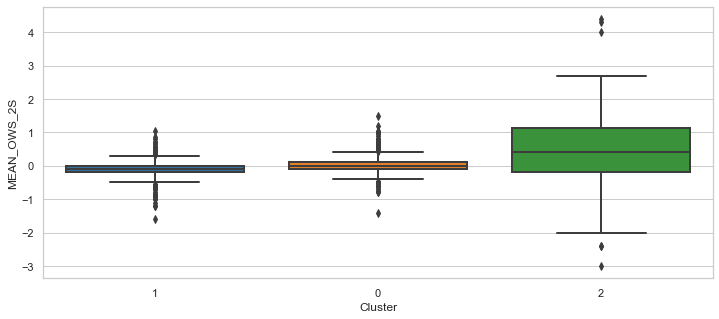

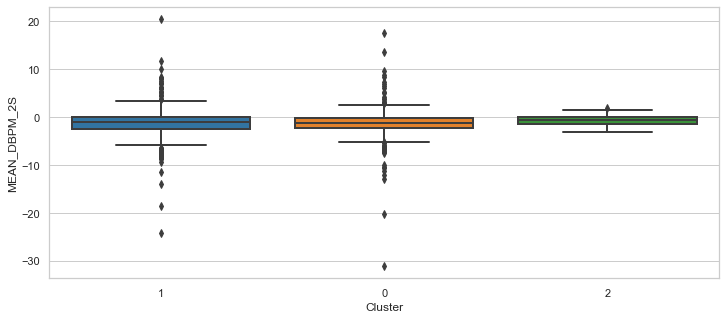

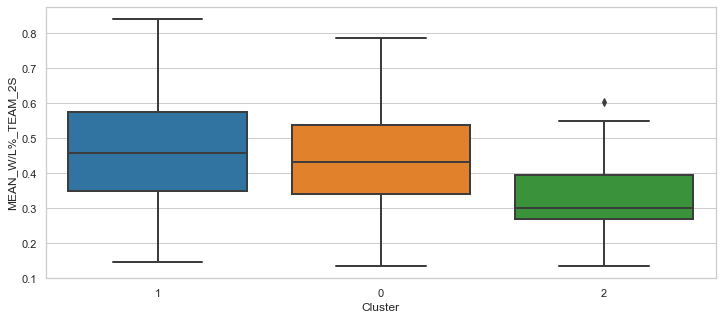

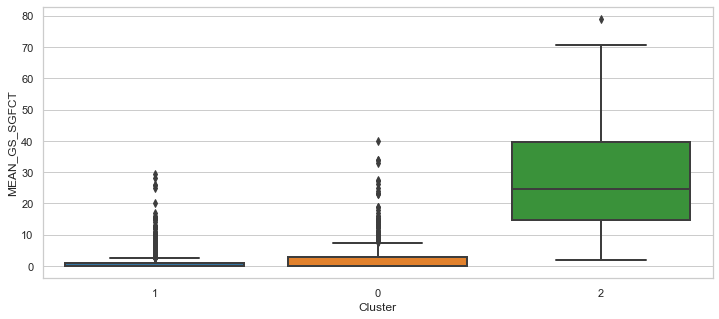

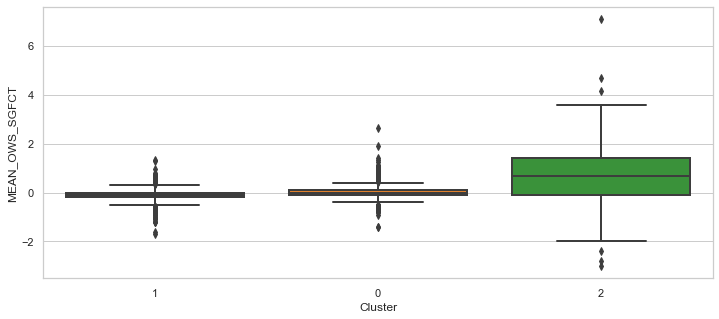

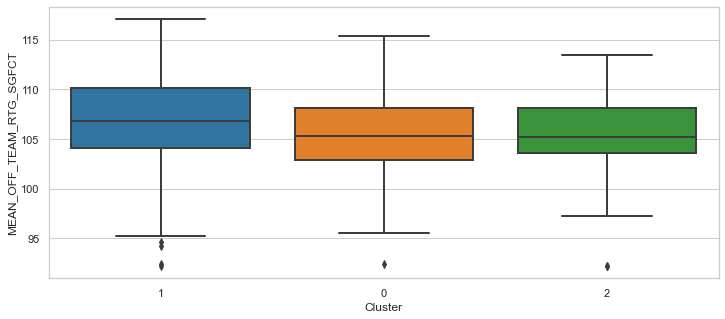

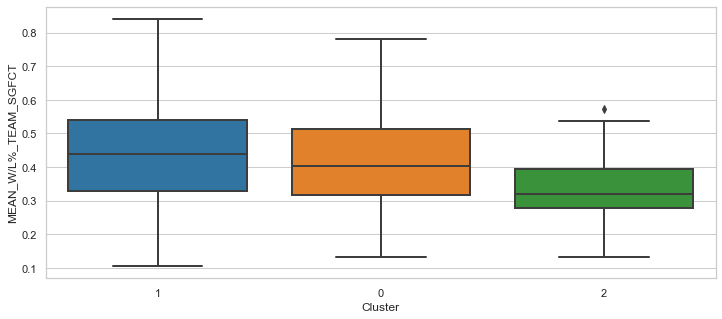

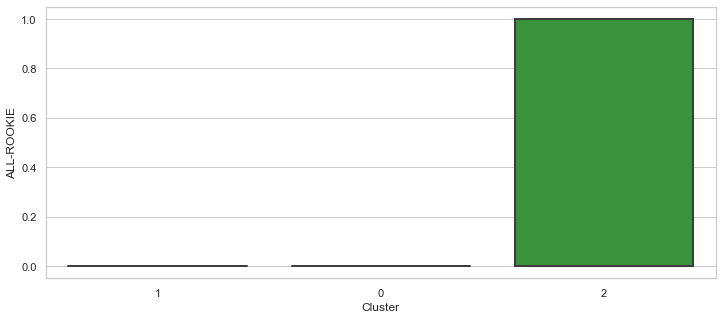

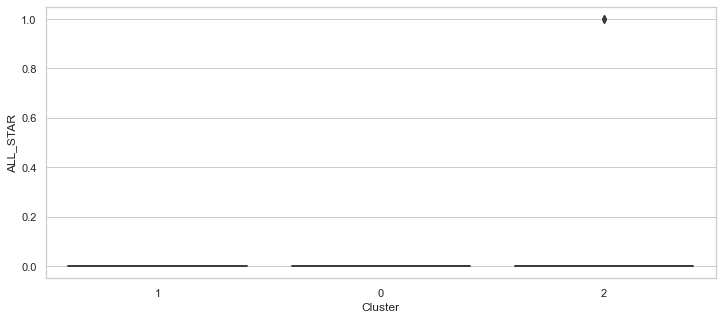

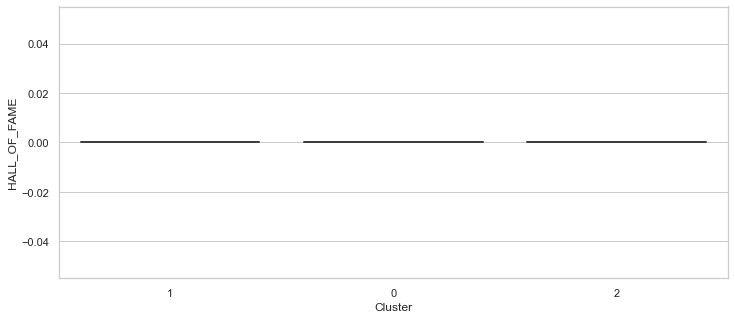

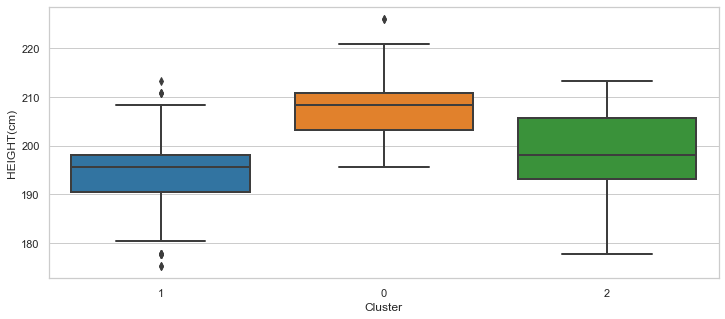

In [139]:
for i in regs_non_common.columns:
    if regs_non_common[i].dtype!='object':
        paint_num_dist(i,regs_non_common)

### 4.6.4 Análisis de las columnas no comunes de *playoff*

In [140]:
playoff_non_common

,URL,MEAN_GS_2S,MEAN_3P_PER_GAME_2S,MEAN_3P%_PER_GAME_2S,MEAN_ORB_PER_GAME_2S,MEAN_AST_PER_GAME_2S,MEAN_FTr_2S,MEAN_ORB%_2S,MEAN_DRB%_2S,MEAN_STL%_2S,...,MEAN_DBPM_2S,MEAN_W/L%_TEAM_SGFCT,ALL_STAR,HALL_OF_FAME,N_PLAYOFFS,MEAN_AST%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,Cluster
0,/players/a/abdelal01.html,0.5,0.00,0.0000,0.85,0.35,0.3295,9.95,22.15,1.00,...,-0.80,0.553600,0,0,3,0.0,0.0,-2.6,-4.6,3
1,/players/a/abdulma02.html,15.0,0.40,0.2850,0.40,2.75,0.1125,1.70,6.40,1.45,...,-2.45,0.404286,0,0,2,18.0,0.2,-0.8,-1.9,4
2,/players/a/abdulta01.html,32.5,0.10,0.2485,1.10,0.95,0.3420,5.65,9.25,2.00,...,-0.85,0.480333,0,0,2,8.1,2.8,2.6,1.9,4
3,/players/a/abdursh01.html,76.5,0.20,0.3355,2.75,2.40,0.4515,8.85,14.00,1.55,...,-1.95,0.332333,1,0,1,10.2,0.0,-3.5,-1.9,4
4,/players/a/abrinal01.html,7.0,1.25,0.3805,0.30,0.50,0.1510,2.20,8.00,1.70,...,0.00,0.579000,0,0,2,7.1,0.0,-2.8,-1.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,/players/z/zevenph01.html,0.0,0.00,0.0000,0.50,0.40,0.0740,7.40,16.90,2.40,...,-0.20,0.378000,0,0,1,0.0,0.0,-4.7,-4.5,3
1277,/players/z/zhizhwa01.html,0.0,0.45,0.2070,0.25,0.20,0.3780,3.30,17.00,0.45,...,-2.65,0.487667,0,0,3,8.0,3.3,1.3,1.6,6
1278,/players/z/zipsepa01.html,15.0,0.75,0.3345,0.25,0.85,0.1440,1.75,15.10,1.05,...,-0.35,0.414500,0,0,1,3.4,0.8,-2.9,-0.7,6
1279,/players/z/zizican01.html,13.5,0.00,0.0000,1.30,0.55,0.4160,11.70,20.70,0.55,...,-1.50,0.232000,0,0,1,8.0,4.0,-2.2,-2.2,3


Análisis de la distribución por clusters de las variables numéricas (las únicas que no son numéricas son *URL* y *Cluster*)

In [141]:
stats = playoff_non_common.groupby('Cluster').describe()
stats.to_excel('./Models/Statistics/Playoff_non_common_GR_statistics.xlsx')

for i in playoff_non_common.columns:
    if playoff_non_common[i].dtype!='object':
        print(i, '\n', stats[i], '\n')

MEAN_GS_2S 
          count       mean        std  min     25%   50%     75%   max
Cluster                                                              
3        392.0  16.108418  19.704573  0.0   1.000   6.5  25.625  82.0
4        397.0  27.884131  22.043642  0.0   9.500  22.5  44.000  82.0
5         66.0  62.719697  19.711209  2.5  56.125  68.5  77.000  82.0
6        426.0   4.404930   7.647514  0.0   0.000   1.0   5.500  59.5 

MEAN_3P_PER_GAME_2S 
          count      mean       std  min   25%    50%     75%   max
Cluster                                                           
3        392.0  0.036097  0.104217  0.0  0.00  0.000  0.0000  0.85
4        397.0  0.764987  0.546426  0.0  0.35  0.650  1.1000  2.70
5         66.0  0.562879  0.659388  0.0  0.05  0.325  0.8375  2.65
6        426.0  0.300939  0.290009  0.0  0.10  0.225  0.4500  2.20 

MEAN_3P%_PER_GAME_2S 
          count      mean       std  min      25%     50%       75%     max
Cluster                                  

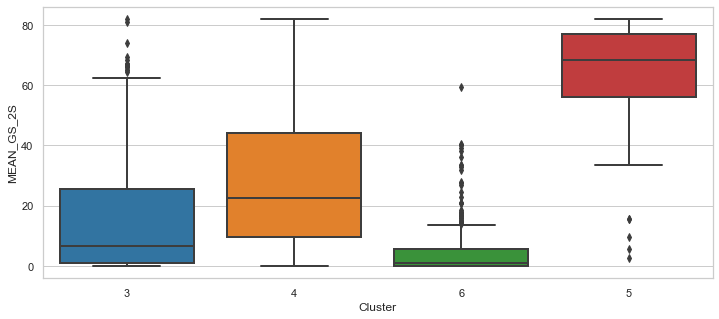

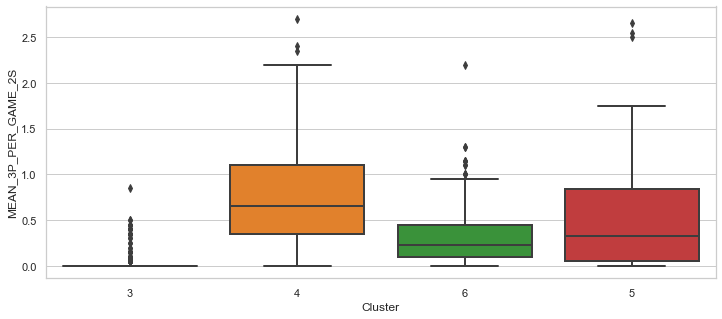

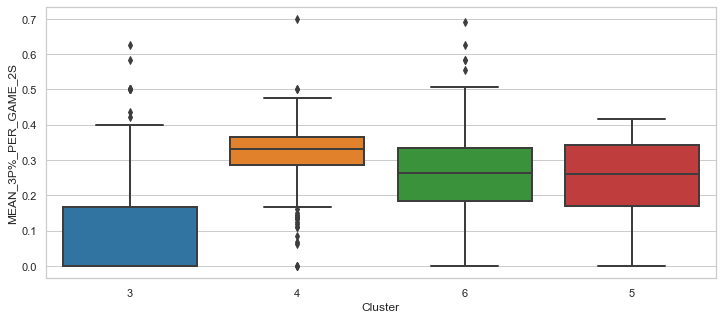

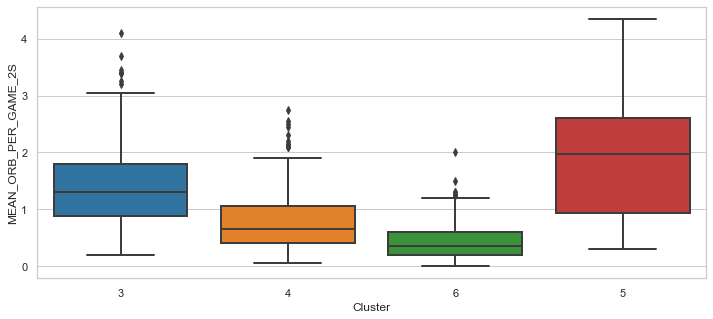

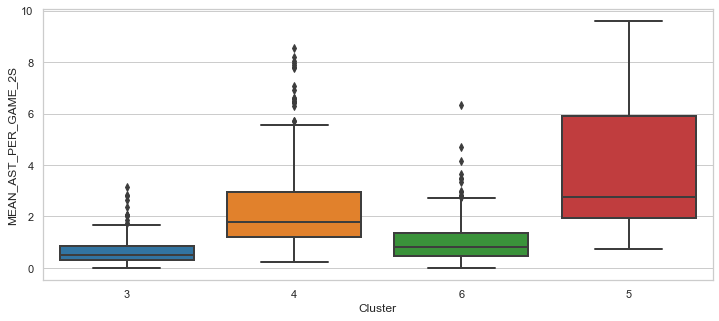

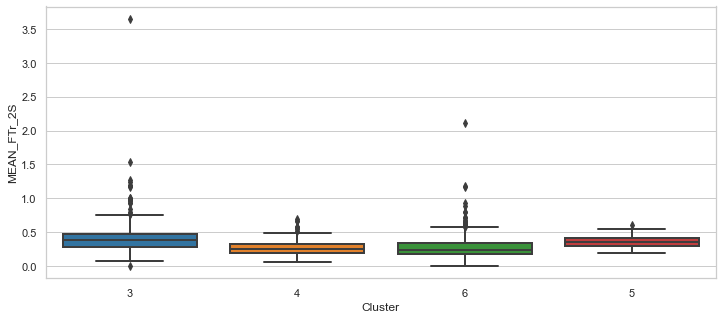

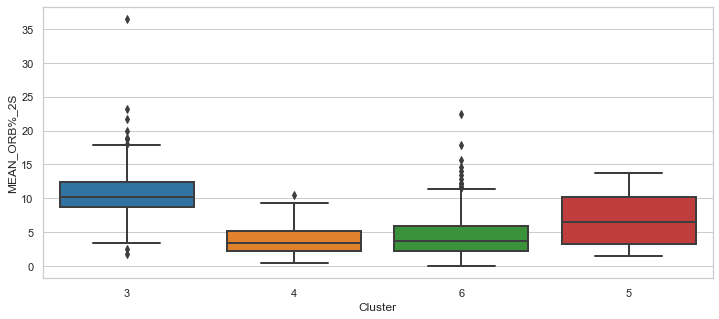

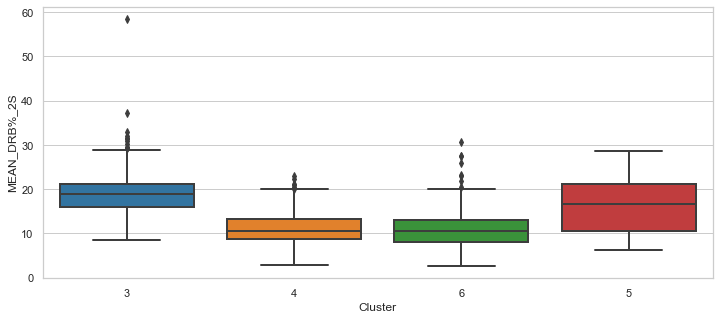

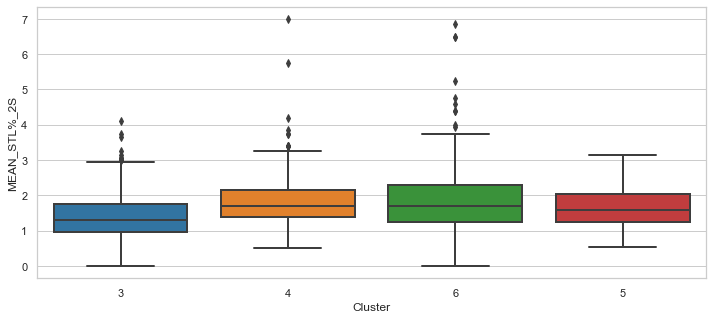

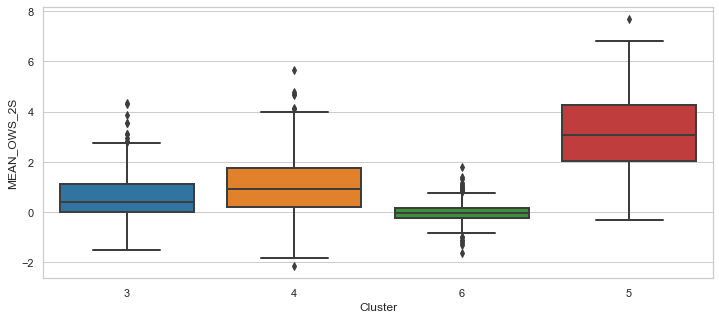

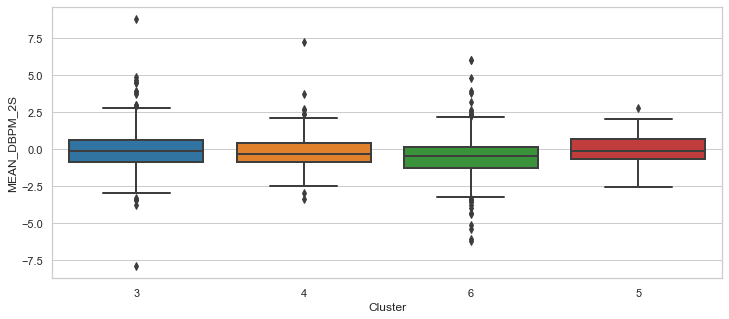

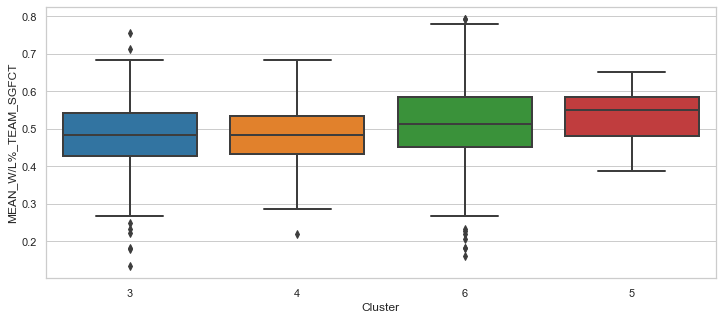

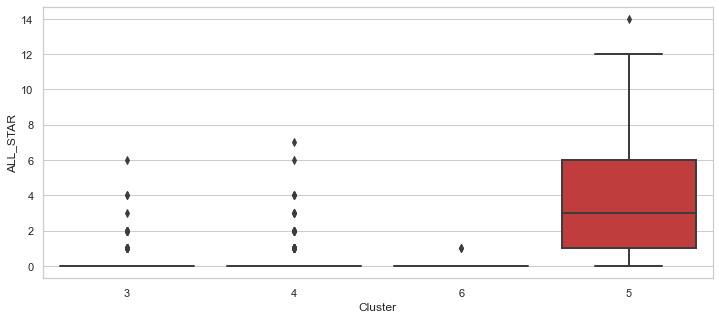

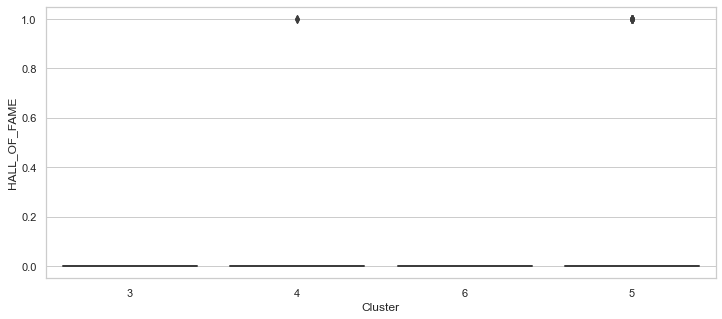

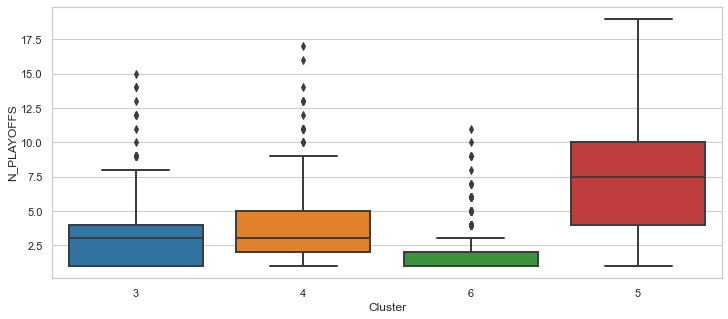

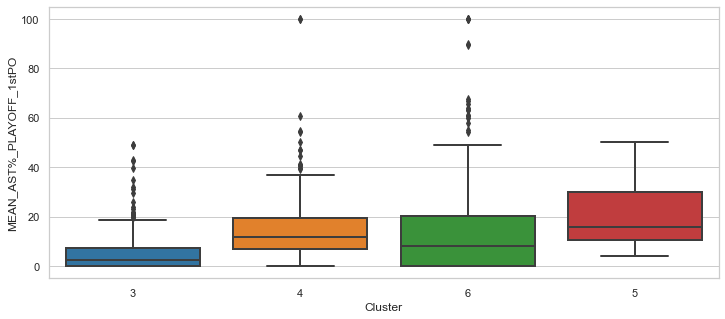

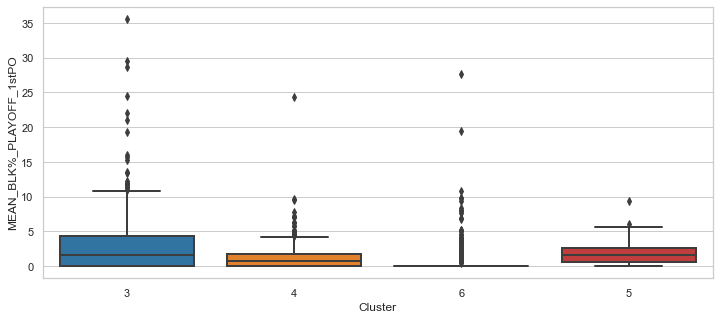

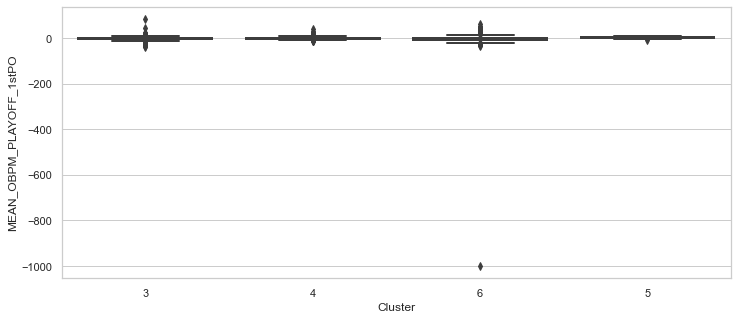

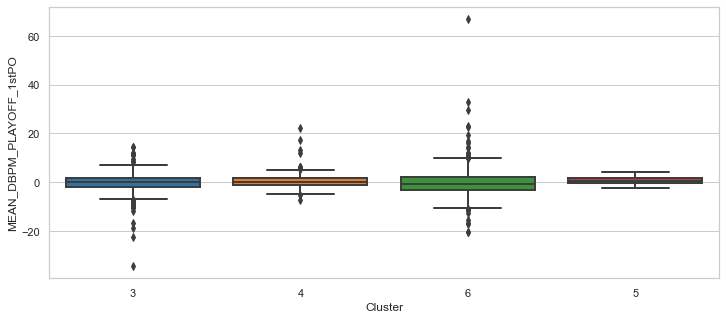

In [142]:
for i in playoff_non_common.columns:
    if playoff_non_common[i].dtype!='object':
        paint_num_dist(i,playoff_non_common)

### 4.6.5 Análisis de las columnas no comunes de *ring*

In [143]:
ring_non_common

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,MEAN_STL%_RING,MEAN_TOV%_RING,MEAN_USG%_RING,MEAN_DBPM_RING,MEAN_OFF_TEAM_RTG_RING,MEAN_W/L%_TEAM_RING,MEAN_G_PLAYOFF_SGFCT,MEAN_BLK%_2S,MEAN_OFF_TEAM_RTG_SGFCT,Cluster
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,0.0,0.00,18.60,-4.6,117.20,0.639,3.000000,0.50,108.100000,7
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,0.0,7.90,21.30,-4.2,110.20,0.805,3.000000,0.75,108.450000,7
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,2.1,2.90,21.40,0.5,109.70,0.695,3.000000,2.70,106.480000,7
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,0.9,11.70,16.10,0.0,110.20,0.805,7.000000,3.20,104.525000,7
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,1.5,11.45,20.45,-0.3,111.25,0.805,15.545455,0.30,107.958824,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,/players/w/wrighan01.html,56.0,10.0,0.413,0.60,0.2910,0.6870,0.70,0.2040,10.0,1.2,12.20,15.20,0.0,110.20,0.805,11.000000,0.70,108.340000,7
335,/players/w/wrighde01.html,49.0,2.0,0.433,0.60,0.3330,0.8690,0.80,0.2080,10.1,2.5,10.40,17.10,1.6,113.10,0.707,8.250000,1.60,113.471429,9
336,/players/w/wrighdo01.html,20.0,2.0,0.465,0.20,0.5000,0.8820,0.10,0.3950,25.6,1.2,21.70,22.60,0.0,108.70,0.634,6.000000,0.30,105.500000,7
337,/players/w/wrighlo02.html,18.0,1.0,0.286,0.00,0.0000,0.5000,0.40,0.2860,21.6,1.0,14.50,7.80,0.3,110.20,0.805,3.750000,2.60,102.763636,8


Análisis de la distribución por clusters de las variables numéricas (las únicas que no son numéricas son *URL* y *Cluster*)

In [144]:
stats = ring_non_common.groupby('Cluster').describe()
stats.to_excel('./Models/Statistics/Ring_non_common_GR_statistics.xlsx')

for i in ring_non_common.columns:
    if ring_non_common[i].dtype!='object':
        print(i, '\n', stats[i], '\n')

MEAN_G_RING 
          count       mean        std  min   25%        50%   75%   max
Cluster                                                               
7         97.0  28.152062  19.807096  1.0  12.0  26.000000  40.0  81.0
8         93.0  53.304301  22.161091  1.0  38.0  59.666667  70.0  82.0
9        149.0  61.417162  19.025132  3.0  53.0  67.000000  75.0  82.0 

MEAN_GS_RING 
          count       mean        std  min       25%   50%   75%   max
Cluster                                                              
7         97.0   2.817869   6.645456  0.0  0.000000   0.5   2.5  50.0
8         93.0  22.626165  26.429653  0.0  1.666667   9.0  45.6  82.0
9        149.0  28.183509  28.551287  0.0  2.000000  17.0  56.0  82.0 

MEAN_FG%_PER_GAME_RING 
          count      mean       std   min     25%       50%     75%    max
Cluster                                                                  
7         97.0  0.385986  0.096210  0.00  0.3400  0.403000  0.4460  0.600
8         93.0 

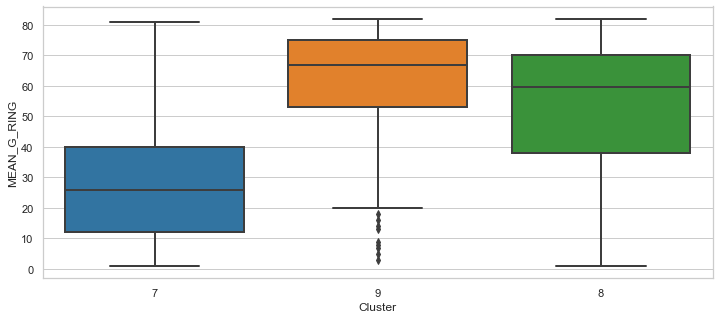

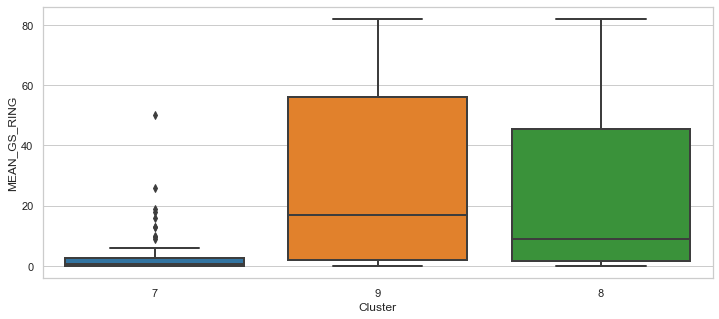

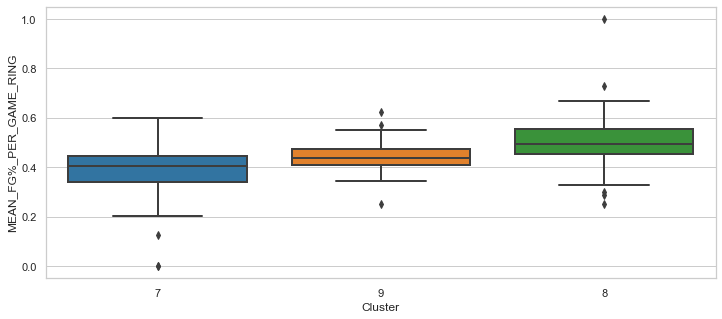

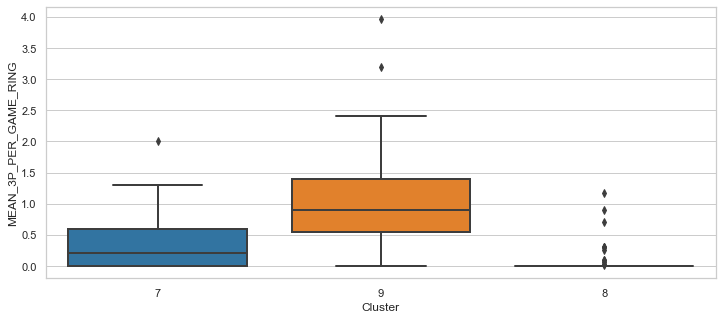

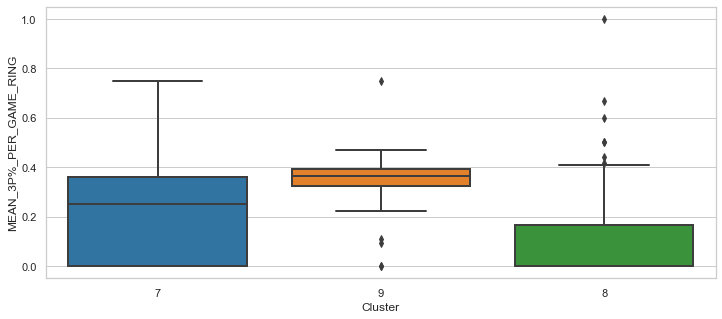

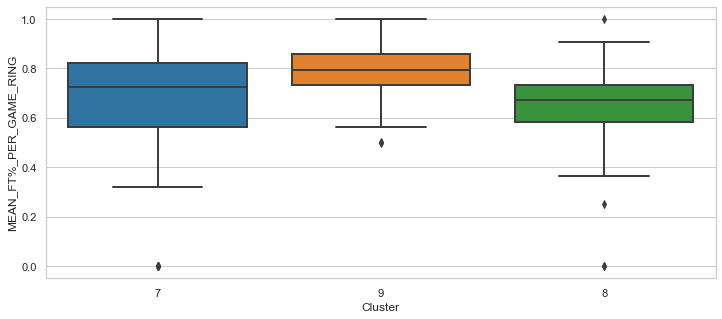

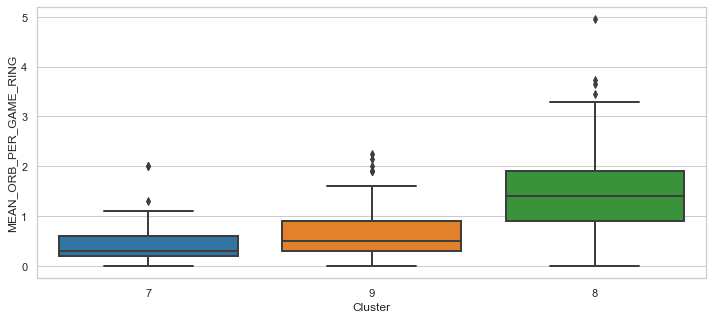

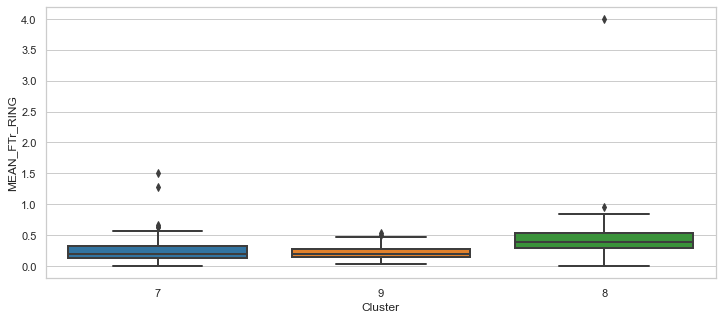

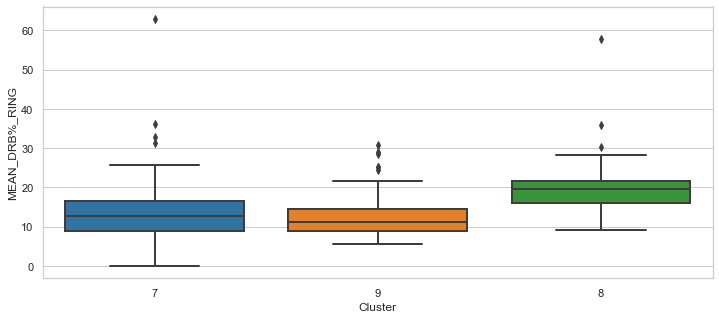

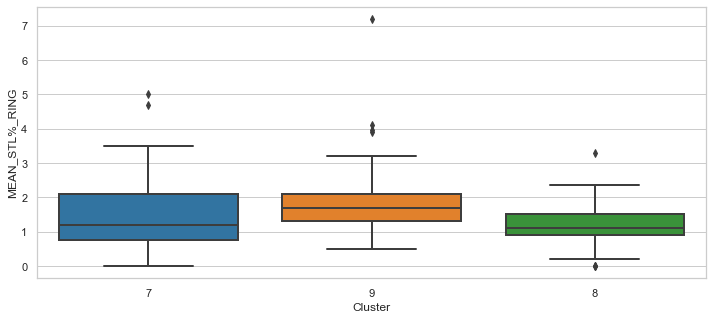

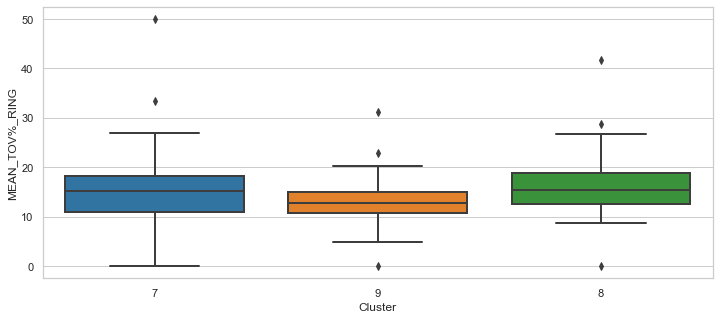

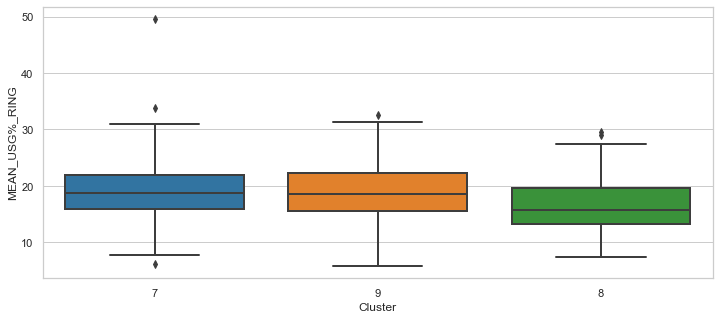

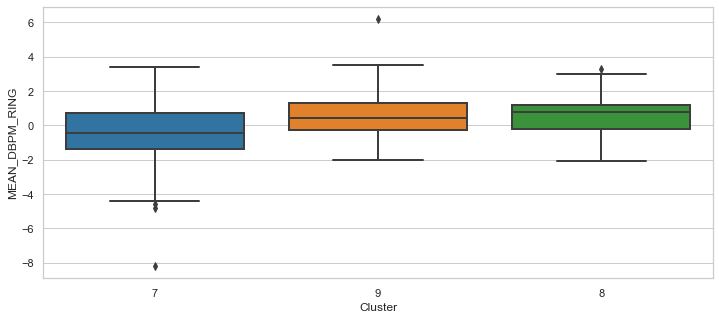

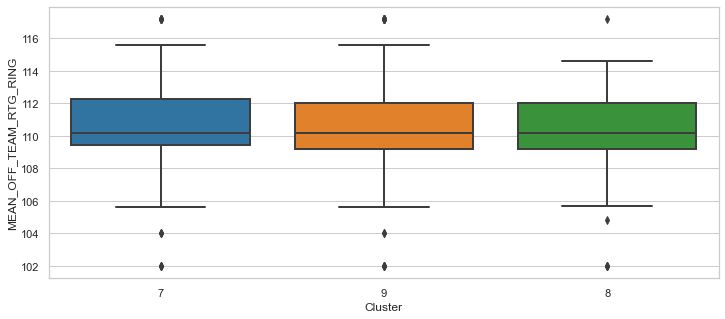

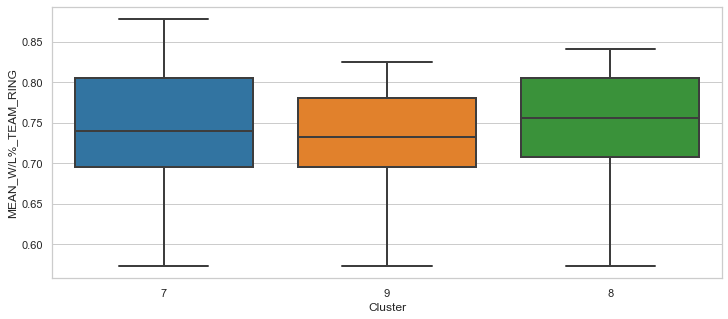

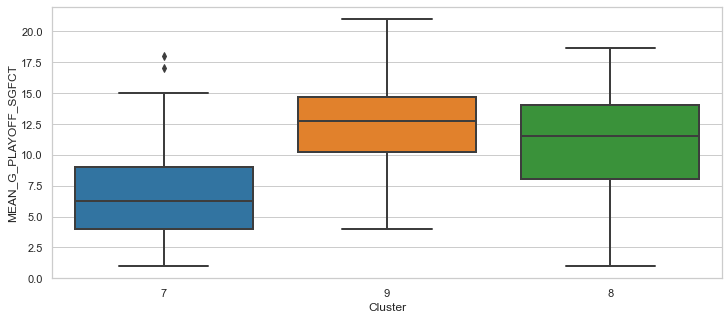

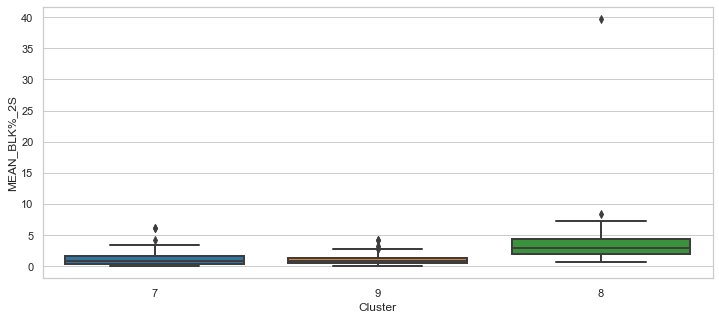

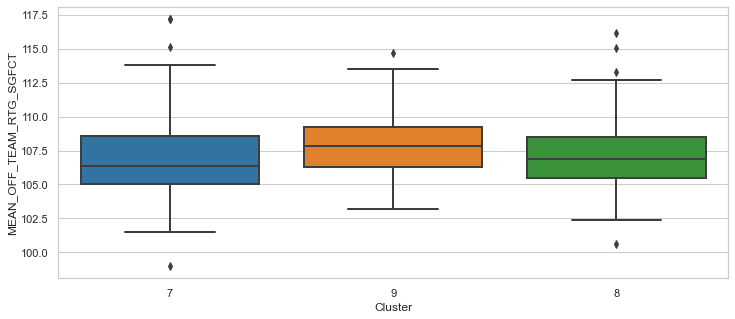

In [145]:
for i in ring_non_common.columns:
    if ring_non_common[i].dtype!='object':
        paint_num_dist(i,ring_non_common)

### 4.6.6 Análisis de columnas "extra"

Análisis de información que hemos usado en otras fases del proyecto yque nos pueden ayudar con el profiling

In [146]:
three_common_df

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.3225,0.2500,14.00,23.65,110.65,102.70,0,60,23,0,1
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.5140,0.7380,15.50,12.40,104.40,107.60,0,37,23,0,0
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,0.3060,1.0000,13.70,9.90,107.70,117.60,0,-100,22,0,1
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.4320,0.5810,10.60,16.45,106.85,107.95,0,-100,25,0,0
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.5000,0.0000,0.00,20.30,105.90,106.50,0,-100,27,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,/players/w/wrighan01.html,1.600000,5,1,2,SG,51.0,0.3980,0.5515,16.00,13.80,104.80,104.50,0,15,22,0,7
2771,/players/w/wrighde01.html,1.571429,7,1,3,PG,27.0,0.4360,0.7535,14.75,19.35,111.15,106.50,0,20,24,1,9
2772,/players/w/wrighdo01.html,2.750000,4,1,1,SF,11.5,0.3690,0.9410,21.25,23.75,109.45,103.80,0,19,20,0,7
2773,/players/w/wrighlo02.html,2.500000,6,1,1,C,73.0,0.4630,0.6230,11.85,15.05,104.20,109.40,0,7,22,0,8


In [149]:
path = './Clean_data/'
players_df = pd.read_csv(path + 'All_players_Clean.csv',index_col=0)

In [150]:
H_W_df = players_df[['URL', 'HEIGHT(cm)','WEIGHT(kg)']]
three_common_df_1 = three_common_df.merge(H_W_df, how='left',on='URL').drop_duplicates().reset_index(drop=True)
three_common_df_1

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_FG%_PER_GAME_2S,MEAN_FT%_PER_GAME_2S,MEAN_TOV%_2S,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster,HEIGHT(cm),WEIGHT(kg)
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.3225,0.2500,14.00,23.65,110.65,102.70,0,60,23,0,1,195.58,83.91
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.5140,0.7380,15.50,12.40,104.40,107.60,0,37,23,0,0,200.66,108.86
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,0.3060,1.0000,13.70,9.90,107.70,117.60,0,-100,22,0,1,200.66,90.72
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.4320,0.5810,10.60,16.45,106.85,107.95,0,-100,25,0,0,200.66,111.13
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.5000,0.0000,0.00,20.30,105.90,106.50,0,-100,27,0,1,180.34,83.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,/players/w/wrighan01.html,1.600000,5,1,2,SG,51.0,0.3980,0.5515,16.00,13.80,104.80,104.50,0,15,22,0,7,200.66,95.25
2771,/players/w/wrighde01.html,1.571429,7,1,3,PG,27.0,0.4360,0.7535,14.75,19.35,111.15,106.50,0,20,24,1,9,195.58,83.91
2772,/players/w/wrighdo01.html,2.750000,4,1,1,SF,11.5,0.3690,0.9410,21.25,23.75,109.45,103.80,0,19,20,0,7,205.74,92.99
2773,/players/w/wrighlo02.html,2.500000,6,1,1,C,73.0,0.4630,0.6230,11.85,15.05,104.20,109.40,0,7,22,0,8,210.82,102.06


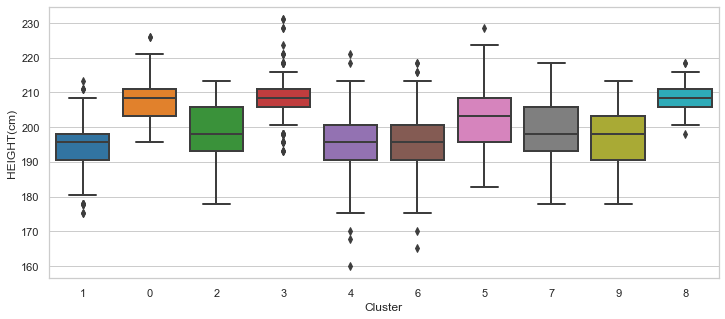

In [151]:
paint_num_dist('HEIGHT(cm)',three_common_df_1)

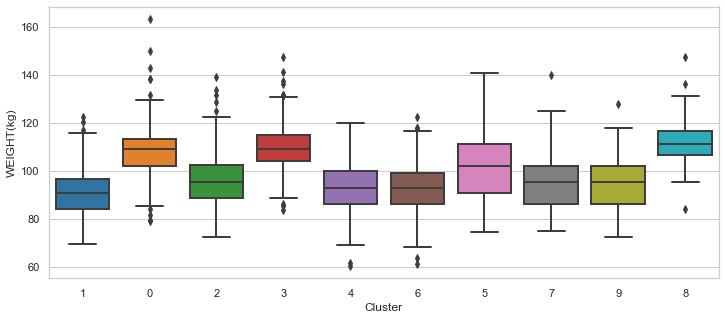

In [152]:
paint_num_dist('WEIGHT(kg)',three_common_df_1)

Obtenemos una tabla resumen de las dimensiones de los jugadores, en cuanto a altura y peso

In [153]:
three_common_df_1[['Cluster', 'HEIGHT(cm)','WEIGHT(kg)']].groupby('Cluster').mean()

,HEIGHT(cm),WEIGHT(kg)
Cluster,,
0,207.860660,108.176179
1,194.169847,90.859015
2,198.602958,96.831831
3,208.137449,109.206786
4,195.420050,92.845466
5,201.891515,101.419394
6,196.146432,92.922042
7,198.093814,95.876598
8,209.017419,111.402903


## 4.7 Perfiles de los jugadores por cluster

### Clúster 0: Jugadores exteriores de rol con poco impacto

**Notas:** Sin participación en *playoffs* o *ring*.

**Descripción:** Jugadores exteriores de rol con poco impacto y participación en la liga NBA. Muchos de ellos no han sido jugadores elegidos en el draft. Representan el clúster más grande (20 %) pero también el clúster con menos jugadores en activo. Todo y tener poco impacto, el impacto ofensivo es un 60 % mayor que el impacto defensivo. Algunos jugadores de este clúster han ido a buscar oportunidades en ligas europeas.

**Jugadores de este clúster son:** *Leandro Bolmaro, Omar Cook, Tyler Dorsey, Nigel Hayes, Cory Higgins, Nico Laprovittola, Sonny Weems.*

### Clúster 1: Jugadores interiores con muy poco impacto

**Notas:** Sin participación en *playoffs* o *ring*.

**Descripción:** Jugadores interiores con muy poco impacto y participación en la liga NBA. Muchos de ellos no han sido jugadores elegidos en el draft. Representan un clúster significativamente grande pero también el clúster con menos jugadores en activo en porcentaje (7 %). Son jugadores con un balance ofensivo/defensivo y que aumentan su impacto a lo largo de su carrera. Algunos jugadores de este clúster han ido a buscar oportunidades en ligas europeas.

**Jugadores de este clúster son:** *Joe Arlaukas, Aleksandar Radojević, Anthony Bennett, Boniface N'Dong, Maciej Lampe, Joe Alexander.*

### Clúster 2: Jovenes promesas de la NBA, jugando en equipos no aspirantes a *ring*


**Notas:** Sin participación en *playoffs* o *ring*. Presencia de algun jugador *all-star*.

**Descripción:** Jugadores jovenes, interiores y exteriores, promesas de la NBA, algunos sin oportunidades. Muchos de ellos han sido jugadores elegidos en el draft. Representan un clúster significativamente pequeño pero con un alto porcentaje de jugadores en activo. Muchos de los jugadores disminuyen su impacto a lo largo de su carrera, diminuyendo participación en la liga NBA.

**Jugadores de este clúster son:** *Hermanos Ball, Zion Williamson, Cade Cunningham, Collin Sexton.*

### Clúster 3: Jugadores exteriores de rol defensivo

**Notas:** Sin impacto significativo en *playoffs* o *ring*.

**Descripción:** Jugadores interiores, con un rol defensivo. Se trata de jugadores de rol defensivo con un impacto medio en su equipo. Son jugadores que no tienen mucho tiempo el balón. La estadística con mayor impacto son los rebotes.

**Jugadores de este clúster son:** *Luis Scola, Manute Bol, Joaquim Noah, Andre Drummond, Kyle O’Quin.*

### Clúster 4: Jugadores de rol en *playoffs* con un impacto bajo

**Notas:** Con un impacto bajo en *playoffs* y *ring*.

**Descripción:** Jugadores mayoritariamente exteriores aunque también interiores, con un rol de rotación en equipos de *playoff*. Representan el clúster más grande. Se trata de jugadores equilibrados que juegan minutos intrascendentes en segundas rotaciones. Generalmente, no generan minutos de calidad y tiene bajos porcentajes ofensivos.

**Jugadores de este clúster son:** *Muggsy Bogues, Seth Curry, Brandon Paul, Mirza Teletović, Juancho Hernangómez.*

### Clúster 5: Jugadores de rol en *playoffs* con un impacto medio

**Notas:** Con un impacto medio en *playoffs* y *ring*. Presencia de algun jugador *all-star*.

**Descripción:** Jugadores mayoritariamente exteriores aunque también interiores, con un rol de rotación, e incluso sexto hombre, en equipos de *playoff*. Contiene el mayor número de jugadores en activo. Se trata de jugadores ofensivos que aportan minutos de calidad y tienen buenos porcentajes ofensivos.

**Jugadores de este clúster son:** *Álex Abrines, Nicolas Batum, Jose Calderón, Andrew Wiggins, Joe Ingles, Rudy Gay.*

### Clúster 6: Jugadores franquicia sin *ring* o con potencial para *ring*

**Notas:** Líderes en *playoffs*. Presencia de jugadores *all-star*.

**Descripción:** Jugadores franquicia, el 25 % solo juega en un equipo durante su carrera, que no han ganado *ring*. Tienen puestos altos en el draft. Buenas estadísticas ofensivas y defensivas, con mucho tiempo de balón en cada jugada. Son jugadores que participan en casi todas las jugadas de su equipo mientras estan en pista.

**Jugadores de este clúster son:** *Vlade Divac, Patt Ewing, Tim Hardaway, Karl Malone, Chris Mullin , Reggie Miller, Arvydas Sabonis, Luka Doncic.*

### Clúster 7: Estrellas exteriores, líderes en *playoffs* y *ring*

**Notas:** Líderes en *playoffs* y *ring*. Presencia de jugadores *all-star*.

**Descripción:** Jugadres estrella exteriores que han sido líderes en *playoffs* y *ring*. Mayor número de *rings* entre todos los clústers. Tienen puestos altos en el draft. Son jugadores con carreras la

**Jugadores de este clúster son:** *Ray Allen, Kobe Bryant, Stephen Curry, Kyrie Irving, LeBron James, Michael Jordan.*

### Clúster 8: Jugadores extranjeros con impacto en *playoffs* y *ring*

**Notas:** Con impacto en *playoffs* y *ring*. Presencia media de jugadores *all-star*.

**Descripción:** 

**Jugadores de este clúster son:** *Alexis Ajinça, Nando de Colo, Rodrigue Beaubois, Jason Kapono.*

### Clúster 9: Estrellas interiores, líderes en *playoffs* y *ring*

**Notas:** Líderes en *playoffs* y *ring*. Presencia de jugadores *all-star*.

**Descripción:** 

**Jugadores de este clúster son:** *Hermanos Gasol, Chris Bosh, David West, Dennis Rodman, Zaza Pachulia*

## 4.8 Guardamos los Clustering Boards

Añadimos el nombre a las distintas tablas y las guardamos.

In [154]:
regs_golden_record_1 = regs_golden_record.merge(players_df[['URL','NAME']], how='left',on='URL').drop_duplicates().reset_index(drop=True)
regs_golden_record_1

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,ALL-ROOKIE,ALL_STAR,ROY,HALL_OF_FAME,DRAFT_PICK,HEIGHT(cm),AGE_ENTRANCE,IS_ACTIVE,Cluster,NAME
0,/players/a/ackeral01.html,1.333333,3,0,1,SG,15.0,0.0,0.3225,0.25,...,0,0,0,0,60,195.58,23,0,1,Alex Acker
1,/players/a/acyqu01.html,1.571429,7,0,2,PF,46.0,0.0,0.5140,0.05,...,0,0,0,0,37,200.66,23,0,0,Quincy Acy
2,/players/a/adelde01.html,1.000000,1,0,1,SF,19.0,3.0,0.3060,0.30,...,0,0,0,0,-100,200.66,22,0,1,Deng Adel
3,/players/a/adrieje01.html,1.166667,6,0,1,PF,15.5,0.0,0.4320,0.00,...,0,0,0,0,-100,200.66,25,0,0,Jeff Adrien
4,/players/a/akognjo01.html,1.000000,1,0,1,PG,3.0,0.0,0.5000,0.30,...,0,0,0,0,-100,180.34,27,0,1,Josh Akognon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,/players/y/yuesu01.html,1.000000,1,1,1,SG,10.0,0.0,0.2730,0.00,...,0,0,0,0,40,205.74,24,0,1,Sun Yue
1151,/players/z/zellelu01.html,1.000000,1,0,1,C,16.0,0.0,0.3460,0.10,...,0,0,0,0,-100,210.82,26,0,0,Luke Zeller
1152,/players/z/zidekge01.html,1.750000,4,0,1,C,61.5,11.5,0.4190,0.00,...,0,0,0,0,-100,213.36,23,0,0,George Zídek
1153,/players/z/zimmede01.html,1.000000,1,0,1,PG,2.0,0.0,0.6670,0.00,...,0,0,0,0,40,190.50,25,0,1,Derrick Zimmerman


In [155]:
playoff_golden_record_1 = playoff_golden_record.merge(players_df[['URL','NAME']], how='left',on='URL').drop_duplicates().reset_index(drop=True)
playoff_golden_record_1

,URL,MEAN_N_SEASONS_X_TEAM,N_TEAMS,N_NBA_CHAMPION,N_POSITIONS,COMMON_POSITION,MEAN_G_2S,MEAN_GS_2S,MEAN_FG%_PER_GAME_2S,MEAN_3P_PER_GAME_2S,...,MEAN_AST%_PLAYOFF_1stPO,MEAN_STL%_PLAYOFF_1stPO,MEAN_BLK%_PLAYOFF_1stPO,MEAN_TOV%_PLAYOFF_1stPO,MEAN_USG%_PLAYOFF_1stPO,MEAN_OWS_PLAYOFF_1stPO,MEAN_OBPM_PLAYOFF_1stPO,MEAN_DBPM_PLAYOFF_1stPO,Cluster,NAME
0,/players/a/abdelal01.html,1.800000,5,0,1,PF,57.0,0.5,0.4835,0.00,...,0.0,0.0,0.0,0.0,19.8,0.0,-2.6,-4.6,3,Alaa Abdelnaby
1,/players/a/abdulma02.html,3.000000,3,0,1,PG,74.0,15.0,0.4170,0.40,...,18.0,0.8,0.2,7.7,24.8,0.2,-0.8,-1.9,4,Mahmoud Abdul-Rauf
2,/players/a/abdulta01.html,2.000000,5,0,1,SG,54.0,32.5,0.4190,0.10,...,8.1,2.2,2.8,7.0,20.0,0.3,2.6,1.9,4,Tariq Abdul-Wahad
3,/players/a/abdursh01.html,2.800000,5,0,3,PF,81.0,76.5,0.4690,0.20,...,10.2,0.8,0.0,20.8,22.8,0.0,-3.5,-1.9,4,Shareef Abdur-Rahim
4,/players/a/abrinal01.html,3.000000,1,0,1,SG,71.5,7.0,0.3940,1.25,...,7.1,0.0,0.0,0.0,13.3,0.1,-2.8,-1.9,4,Álex Abrines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,/players/z/zevenph01.html,1.000000,1,0,1,C,8.0,0.0,0.5560,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,-4.7,-4.5,3,Phil Zevenbergen
1277,/players/z/zhizhwa01.html,1.750000,4,0,1,C,30.0,0.0,0.4305,0.45,...,8.0,2.4,3.3,9.7,20.8,0.0,1.3,1.6,6,Wang Zhizhi
1278,/players/z/zipsepa01.html,2.000000,1,0,1,SF,49.0,15.0,0.3720,0.75,...,3.4,0.4,0.8,16.1,14.4,0.1,-2.9,-0.7,6,Paul Zipser
1279,/players/z/zizican01.html,3.000000,1,0,1,C,45.5,13.5,0.6420,0.00,...,8.0,0.0,4.0,13.7,29.5,0.0,-2.2,-2.2,3,Ante Žižić


In [156]:
ring_golden_record_1 = ring_golden_record.merge(players_df[['URL','NAME']], how='left',on='URL').drop_duplicates().reset_index(drop=True)
ring_golden_record_1

,URL,MEAN_G_RING,MEAN_GS_RING,MEAN_FG%_PER_GAME_RING,MEAN_3P_PER_GAME_RING,MEAN_3P%_PER_GAME_RING,MEAN_FT%_PER_GAME_RING,MEAN_ORB_PER_GAME_RING,MEAN_FTr_RING,MEAN_DRB%_RING,...,MEAN_USG%_2S,MEAN_OFF_TEAM_RTG_2S,MEAN_DEFF_TEAM_RTG_2S,MEAN_OFF_TEAM_RTG_SGFCT,ROY,DRAFT_PICK,AGE_ENTRANCE,IS_ACTIVE,Cluster,NAME
0,/players/a/adamsja01.html,7.0,0.0,0.125,0.00,0.0000,0.0000,0.00,0.0000,16.9,...,16.05,112.65,112.65,108.100000,0,-100,23,0,7,Jaylen Adams
1,/players/a/agerma01.html,26.0,3.0,0.323,0.10,0.1580,0.5000,0.20,0.1850,6.3,...,21.50,110.75,101.05,108.450000,0,28,23,0,7,Maurice Ager
2,/players/a/ajincal01.html,10.0,2.0,0.375,0.30,0.4290,0.6670,0.50,0.0940,18.0,...,21.75,104.55,104.45,106.480000,0,-100,21,0,7,Alexis Ajinça
3,/players/a/allenma01.html,73.0,16.0,0.480,0.00,0.5000,0.9200,0.90,0.0760,13.6,...,18.35,97.60,101.30,104.525000,0,-100,24,0,7,Malik Allen
4,/players/a/allenra02.html,76.0,36.5,0.447,2.15,0.4085,0.8965,0.75,0.2415,9.2,...,22.85,104.85,106.95,107.958824,0,5,22,0,9,Ray Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,/players/w/wrighan01.html,56.0,10.0,0.413,0.60,0.2910,0.6870,0.70,0.2040,10.0,...,13.80,104.80,104.50,108.340000,0,15,22,0,7,Antoine Wright
335,/players/w/wrighde01.html,49.0,2.0,0.433,0.60,0.3330,0.8690,0.80,0.2080,10.1,...,19.35,111.15,106.50,113.471429,0,20,24,1,9,Delon Wright
336,/players/w/wrighdo01.html,20.0,2.0,0.465,0.20,0.5000,0.8820,0.10,0.3950,25.6,...,23.75,109.45,103.80,105.500000,0,19,20,0,7,Dorell Wright
337,/players/w/wrighlo02.html,18.0,1.0,0.286,0.00,0.0000,0.5000,0.40,0.2860,21.6,...,15.05,104.20,109.40,102.763636,0,7,22,0,8,Lorenzen Wright


In [157]:
path = './Models/Clustering Board/'

regs_golden_record_1.to_excel(path + 'RegS_Clustering_Board.xlsx')
playoff_golden_record_1.to_excel(path + 'Playoff_Clustering_Board.xlsx')
ring_golden_record_1.to_excel(path + 'Ring_Clustering_Board.xlsx')